# Director Skill Sets Table 7 - Departures only

In [1]:
import pandas_datareader.data as web #to collect data
import datetime as dt #to specify start and end dates

# import yfinance as yf

import eventstudy as es
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits as mplot3d
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.spatial.distance import cdist


from sklearn.neighbors import NearestNeighbors

import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.rolling import RollingOLS

from patsy import dmatrices
from tqdm.notebook import tqdm
tqdm.pandas()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import_folder_path = rf"C:\Users\SHIVAM\Desktop\Finance\Kavitha Ranganathan TAPMI\Rookie Directors Project\Data Analysis\Data Analysis\[IN USE] Rookie Directors\FF3M CAR precode\car_output4"
output_folder_path = "analysis_outputs"
pca_input_folder_path = rf"C:\Users\SHIVAM\Desktop\Finance\Kavitha Ranganathan TAPMI\Rookie Directors Project\Data Analysis\Data Analysis\[IN USE] Rookie Directors\Director Skills PCA\director_skills_pca"
supporting_folder_path = "supporting_datafiles"

In [3]:
dirFirm0 = pd.read_pickle(rf"{import_folder_path}\Director Level_FF3_CAR.pkl")
pca = pd.read_pickle(rf"{pca_input_folder_path}\Main_Director_COMPLETE_PCA.pkl")

pca_col = [
    "Person Code", "AsOnDate", "Symbol",
    "SkillsetIndex", "SkillsetGeneralistDummy",
    "PC1_FactorScore", "PC1_FactorScore_Standardised"
]

pca2 = pca[pca_col].copy()
dirFirm = dirFirm0.merge(pca2, on = ["Person Code", "AsOnDate", "Symbol"], how = "left")

In [4]:
# dirFirm data wrangling if any:
dirFirm["Appointment Year"] = [x.year for x in dirFirm["Appointment Date"]]

dirFirm = dirFirm.drop_duplicates(subset = ["Person Code", "Company", "Appointment Date"]).reset_index(drop = True)

dirFirm["ln_dirage"] = np.log(dirFirm["Age"] + 1).astype("float")
dirFirm["ln_directorships"] = np.log(dirFirm["CompCountOtherPastTotalAB"] + 1).astype("float")

In [5]:
dirFirm.describe()

,AsOnDate,AsOnYear,Date of Birth,Tenure Valid till,Appointment Date,Cessation Date,PrevLastServed,NextServed,CessationDummy,ReappointDummy,TermStartDummy,TermNumber,AppointDummy,CumOpBalUnc,CumOpBalIndep,CumOpBalNonIndep,CumCloBalUnc,CumCloBalIndep,CumCloBalNonIndep,TermOpBalUnc,TermOpBalIndep,TermOpBalNonIndep,TermOpBalTotal,TermCloBalUnc,TermCloBalIndep,TermCloBalNonIndep,TermCloBalTotal,CompOpBalUnc,CompOpBalIndep,CompOpBalNonIndep,CompOpBalTotal,CompCloBalUnc,CompCloBalIndep,CompCloBalNonIndep,CompCloBalTotal,CloBalTotalXP,CountOtherPastUnclearA,CountOtherPastIndepA,CountOtherPastNonIndepA,CompCountOtherPastTotalA,CountOtherPastUnclearAB,CountOtherPastIndepAB,CountOtherPastNonIndepAB,CompCountOtherPastTotalAB,CountCurrUnclearA,CountCurrIndepA,CountCurrNonIndepA,CompCountCurrTotalA,CountCurrUnclearAB,CountCurrIndepAB,CountCurrNonIndepAB,CompCountCurrTotalAB,IsIndep,IsNonIndep,IsRookie,IsNonRookie,IsCeoMDPosition,IsChairmanPosition,IsCeoMDOccupation,IsChairmanOccupation,IsCeoMD,IsChairman,IsPromoterClassification,IsPromoterBoard,IsPromoter,IsDualityChairmanMD,IsFamilyManager,IsFamilyChairman,IsFamilyChairmanAndCEO,IsRookieIndep,IsRookieNonIndep,IsNonRookieIndep,IsNonRookieNonIndep,IsFemale,Age,TenureInYearsinCompIndep,TenureInYearsinCompTotal,IsFirstTerm,IsFirstTermIndep,IsOneYear,IsOneYearIndep,IsTwoYear,IsTwoYearIndep,IsThreeYear,IsThreeYearIndep,IsRetires5y,IsTermLimitRetirement,IsDefaultTerm,IsBusy,IsTurnOver,HasRetires5y,HasTermLimitRetirement,IsTurnOverIndep,Prowess company code,IsMBA,IsPhD,HasFinanceXP,HasTechXP,HasRelatedIndustryXP,IsExecCurrent,NumExecAll,IsOutsideExecXP,HasExecXP,PublicExecXPDummy,PrivateExecXPDummy,HasPublicExecXP,HasPrivateExecXP,HasTechSkill,HasFinanceSkill,NumSkills,NumFirmsPast,NumIndustryPast,HasCeoMDChairXP,HasConglomerateXP,skilllist_sustainability,skilllist_entrepreneurial,skilllist_compensation,skilllist_conglomerate_experience,skilllist_hr,skilllist_technology,skilllist_finance_accounting,skilllist_governance,skilllist_government_policy,skilllist_international,skilllist_leadership,skilllist_legal,skilllist_marketing,skilllist_risk_management,skilllist_scientific,skilllist_strategic_planning,skilllist_manufacturing_supply_chain,Academic,Manufacturing,Outside Board,Company Business,profile_sustainability,profile_entrepreneurial,profile_compensation,profile_conglomerate_experience,profile_hr,profile_technology,profile_finance_accounting,profile_governance,profile_government_policy,profile_international,profile_leadership,profile_legal,profile_marketing,profile_risk_management,profile_scientific,profile_strategic_planning,profile_manufacturing_supply_chain,committee_sustainability,committee_entrepreneurial,committee_compensation,committee_conglomerate_experience,committee_hr,committee_technology,committee_finance_accounting,committee_governance,committee_government_policy,committee_international,committee_leadership,committee_legal,committee_marketing,committee_risk_management,committee_scientific,committee_strategic_planning,committee_manufacturing_supply_chain,combined_sustainability,combined_entrepreneurial,combined_compensation,combined_conglomerate_experience,combined_hr,combined_technology,combined_finance_accounting,combined_governance,combined_government_policy,combined_international,combined_leadership,combined_legal,combined_marketing,combined_risk_management,combined_scientific,combined_strategic_planning,combined_manufacturing_supply_chain,NumSkills_dummies,Total No.of Board Meetings Held,No.of Meetings Attended,percent_board_absence,ProwessCode,ACP,pct,RF,RMRF,MF,SMB,HML,OLS120_intercept,OLS120_RMRF,OLS120_SMB,OLS120_HML,OLS120_r_squared,OLS120_adjusted_r_squared,OLS120_f_p_value,120CAR3,120CAR5,120CAR7,120CAR11,OLS150_intercept,OLS150_RMRF,OLS150_SMB,OLS150_HML,OLS150_r_squared,OLS150_adjusted_r_squared,OLS150_f_p_value,150CAR3,150CAR5,150CAR7,150CAR11,OLS180_intercept,OLS180_RMRF,OLS180_SMB,OLS180_HML,OLS180_r_squared,OLS180_adjusted_r_squared,OLS180_f_p_value,180CAR3,180CAR5,

# PSM

## Verifying and removing those rows with no control data points

In [6]:
# Sample constraints ---> govtdummy==0 & findummy==0 & asonyear>2012
dirFirm.columns.to_list()

['Symbol',
 'Company',
 'AsOnDate',
 'AsOnYear',
 'ISIN',
 'Person Code',
 'Director Salutation',
 'Director First Name',
 'Director Middle Name',
 'Director Surname',
 'Date of Birth',
 'Gender',
 'Nationality',
 'Member of Civil Services',
 'Promoter Director (Yes/No)',
 'Position on Board',
 'Independent (Yes/No)',
 'Education1',
 'Education2',
 'Education3',
 'Education4',
 'Education5',
 'Education6',
 'Education7',
 'Education8',
 'Education9',
 'Education10',
 'Skills/Competencies',
 'Occupation',
 'Cessation Reason',
 'Other Directorship 1',
 'Other Directorship 2',
 'Other Directorship 3',
 'Other Directorship 4',
 'Other Directorship 5',
 'Other Directorship 6',
 'Other Directorship 7',
 'Other Directorship 8',
 'Other Directorship 9',
 'Other Directorship 10',
 'Other Directorship 11',
 'Other Directorship 12',
 'Other Directorship 13',
 'Other Directorship 14',
 'Other Directorship 15',
 'Brief Profile',
 'Tenure Valid till',
 'Indep',
 'Appointment Date',
 'Cessation Date'

In [7]:
dirFirm["IsDualityChairmanMD"] = dirFirm["IsDualityChairmanMD"].astype(int)


# dirFirm["NIC_2digit"] = dirFirm["NIC code"].dropna().apply(lambda x: x[0:2])
# dirFirm["NIC_2digit"] = dirFirm["NIC_2digit"]

psmSample = dirFirm.loc[ (dirFirm["Appointment Date"] >= "2013-03-31")].copy()
# \
# & (dirFirm["govtdummy"] == 0) & (dirFirm["findummy"] == 0) ].copy()
#.dropna(subset = controlVars).dropna(subset = dependentVar).copy()

psmSample["DummySum"] = psmSample["IsRookie"] + psmSample["IsNonRookie"]
psmSample["DummySumIndep"] = psmSample["IsRookieIndep"] + psmSample["IsNonRookieIndep"]

psmSampleAll = psmSample.loc[ psmSample["DummySum"] == 1 ].reset_index(drop = True)
#psmSampleAll = psmSampleAll.loc[ ~psmSampleAll.duplicated(subset = ["AsOnDate", "Symbol", "Appointment Date"], keep = False)]

psmSampleIndep = psmSample.loc[ psmSample["DummySumIndep"] == 1 ].reset_index(drop = True)
#psmSampleIndep = psmSampleIndep.loc[ ~psmSampleIndep.duplicated(subset = ["AsOnDate", "Symbol", "Appointment Date"], keep = False)]

In [8]:
# dirFirm2 = dirFirm.copy()
# psmSampleIndep2 = psmSampleIndep.copy()

# listCol = [
#     "FirstYearPCodeList", "TwoYearPCodeList", "ThreeYearPCodeList", "PCodeList",
#     "FirstYearIndepPCodeList", "TwoYearIndepPCodeList", "ThreeYearIndepPCodeList", "IndepPCodeList",
#     "OtherFirstYearIndepPCode", "OtherTwoYearIndepPCode", "OtherThreeYearIndepPCode", "TotalIndepPCode",
#     "OtherFirstYearPCode", "OtherTwoYearPCode", "OtherThreeYearPCode", "TotalPCode",
#     "OtherFirstYearPCodeIndepExcl","OtherTwoYearPCodeIndepExcl", "OtherThreeYearPCodeIndepExcl", "TotalPCodeIndepExcl",
#     "OtherFirstYearPCodeExcl", "OtherTwoYearPCodeExcl", "OtherThreeYearPCodeExcl", "TotalPCodeExcl"
# ]

# dirFirm2 = dirFirm2.drop(listCol, axis = 1)
# psmSampleIndep2 = psmSampleIndep2.drop(listCol, axis = 1)


# dirFirm2.to_csv("Main_Firm_PSM Ready_no filter v040425.csv")
# psmSampleIndep2.to_csv("Main_Firm_PSM Ready_filter-Indep_gov_fin v040425.csv")


# # # psmSampleAll --> 2101 rows 
# # psmSampleIndep --> 1561 rows 

## PSM --> RookieAppoints as Treatment, NonRookieAppoints as Control

In [9]:
def LogitReg(sample, endog_var, exog_var):
    
    # Logit Regression
    endog = sample[[endog_var]]
    exog = sample[exog_var]
    exog = sm.add_constant(exog)
    
    log_reg = sm.Logit(endog, exog).fit()

    propensityScores = log_reg.predict(exog)
    
    return propensityScores

In [10]:
def MeanDiffTtest(sample, endog_var, exog_var, car, depVar, dirFirm):

    sample[car] = winsorize(sample[car], limits = [0.01, 0.01])
    if depVar != None:
        dirFirm = dirFirm.rename( {depVar:f"{depVar}_2"}, axis = 1)
    
        colsAdd = []
        for i in range(-1, 4):
            if i != 0:
                colsAdd.append(f"AsOnYear_T+{i}")
                colsAdd.append(f"{depVar}T+{i}")
                if i>0 :
                    colsAdd.append(depVar+f"(T+{i}) - (T-1)")
    
        newFrame= pd.DataFrame(columns = colsAdd, data = 0, index = sample.index, dtype = "int")
        sample = pd.concat([sample, newFrame], axis = 1)
        sample = sample.copy()
        
        for i in range(-1, 4):
            if i != 0:
                sample.loc[:, f"AsOnYear_T+{i}"] = sample["AsOnYear"] + i
    
        for i in range(-1, 4):
            if i != 0:
                sample.loc[:, f"{depVar}T+{i}"] = sample.merge(dirFirm[["Symbol", "AsOnYear", f"{depVar}_2"]].copy(), left_on = ["Symbol", f"AsOnYear_T+{i}"],
                                                              right_on = ["Symbol", "AsOnYear"], how = "left")[f"{depVar}_2"]
        
        for i in range(1, 4):
            if i != 0:
                sample.loc[:, depVar+f"(T+{i}) - (T-1)"] = sample[f"{depVar}T+{i}"] - sample[f"{depVar}T+-1"]
    
            
        sample = sample.copy()
    
    group1 = sample.loc[ sample[endog_var] == 1].copy()
    group2 = sample.loc[ sample[endog_var] == 0].copy()
    
    t_stat, p_value = stats.ttest_ind(group1[car], group2[car], equal_var=False)  # Welch’s t-test (default)

    print("\n")
    print(car, ":")
    print("\n")
    print("T Statistic:", t_stat, " P Value:",p_value)
    print("Treated Mean:", group1[car].mean(), " Control Mean:", group2[car].mean(), " Diff:", group1[car].mean() - group2[car].mean())
    print("Treated Median:", group1[car].median(), " Control Median:", group2[car].median(), " Diff:", group1[car].median() - group2[car].median())
    print("Treated N:", len(group1[car]), "; Control N:", len(group2[car]))
    print("[treated unique = ", len(group1.loc[ :, ["Person Code", "Symbol", "AsOnDate"]].drop_duplicates()), "]",\
          "[control unique = ", len(group2.loc[ :, ["Person Code", "Symbol", "AsOnDate"]].drop_duplicates()), "]"
         )
    print("\n")

    # -----------------------------------------------------------------------------------------------------------------
    
    if exog_var != None:
        print("━"*120)
        print(f'{"Matching Variable":<40} {"Treatment Firms":<20} {"Control Firms":<20} {"Test of Diff (p value)":<20}')
        print(f'{" ":<40} {"N = " + str(len(group1[car])):<20} {"N = " + str(len(group2[car])):<20}')
        print("-"*120)

        for var in exog_var:
            treatMean = group1[var].mean()
            controlMean = group2[var].mean()
            p_value = stats.ttest_ind(group1[var], group2[var], equal_var=False)[1]
            print(f'{var:<40} {treatMean:<20.4f} {controlMean:<20.4f} {p_value:<20.4f}')
    
        print("━"*120, "\n")
    
    # -----------------------------------------------------------------------------------------------------------------


    if depVar != None:
        print(depVar, " across years:\n")
        for i in range(1,4):
            sample = sample.dropna(subset = [depVar+f'(T+{i}) - (T-1)'])
    
        group1 = sample.loc[ sample[endog_var] == 1].copy()
        group2 = sample.loc[ sample[endog_var] == 0].copy()

        print("━"*150, "\n")
        print(f'{depVar:<40}{" ":<20}{"Treatment Firms":<20}{"Control Firms":<20}{"Difference":<20}{"Test of Diff":<20}{"Test of Diff"}')
        print(f'{" ":<120}{"(t stat)":<20}{"(p value)":<20}')
    
        print("─"*150, "\n")
    
        for i in range(1,4):
            t_stat2, p_value2 = stats.ttest_ind(group1[depVar+f'(T+{i}) - (T-1)'], group2[depVar+f'(T+{i}) - (T-1)'], equal_var=False)  # Welch’s t-test (default)
            
            treatedMean = group1[depVar+f'(T+{i}) - (T-1)'].mean()
            controlMean = group2[depVar+f'(T+{i}) - (T-1)'].mean()
            diffMean = treatedMean - controlMean
    
            treatedMedian = group1[depVar+f'(T+{i}) - (T-1)'].median()
            controlMedian = group2[depVar+f'(T+{i}) - (T-1)'].median()
            diffMedian = treatedMedian - controlMedian
    
            print(f'{"Year_T+" + str(i) +" - Year_T-1":<40}{"<MEAN>":<20}{treatedMean:<20.4f}{controlMean:<20.4f}{diffMean:<20.4f}{t_stat2:<20.4f}{p_value2:<20.10f}')
    
            label1 = "Treated N: " + str(len(group1[depVar+f'(T+{i}) - (T-1)']))
            label2 = "Control N: " + str(len(group2[depVar+f'(T+{i}) - (T-1)']))
            
            print(f'{label1 + " "*5 + label2:<40}{"<MEDIAN>":<20}{treatedMedian:<20.4f}{controlMedian:<20.4f}{diffMedian:<20.4f}')
            
            print("-"*150, "\n")
            
        print("━"*150, "\n")

    return

In [11]:
def OneSampleTtest(sample, endog_var, exog_var, car, depVar, dirFirm):

    # if depVar != None:
    #     dirFirm = dirFirm.rename( {depVar:f"{depVar}_2"}, axis = 1)
    
    #     colsAdd = []
    #     for i in range(-1, 4):
    #         if i != 0:
    #             colsAdd.append(f"AsOnYear_T+{i}")
    #             colsAdd.append(f"{depVar}T+{i}")
    #             if i>0 :
    #                 colsAdd.append(depVar+f"(T+{i}) - (T-1)")
    
    #     newFrame= pd.DataFrame(columns = colsAdd, data = 0, index = sample.index, dtype = "int")
    #     sample = pd.concat([sample, newFrame], axis = 1)
    #     sample = sample.copy()
        
    #     for i in range(-1, 4):
    #         if i != 0:
    #             sample.loc[:, f"AsOnYear_T+{i}"] = sample["AsOnYear"] + i
    
    #     for i in range(-1, 4):
    #         if i != 0:
    #             sample.loc[:, f"{depVar}T+{i}"] = sample.merge(dirFirm[["Symbol", "AsOnYear", f"{depVar}_2"]].copy(), left_on = ["Symbol", f"AsOnYear_T+{i}"],
    #                                                           right_on = ["Symbol", "AsOnYear"], how = "left")[f"{depVar}_2"]
        
    #     for i in range(1, 4):
    #         if i != 0:
    #             sample.loc[:, depVar+f"(T+{i}) - (T-1)"] = sample[f"{depVar}T+{i}"] - sample[f"{depVar}T+-1"]
    
            
    #     sample = sample.copy()
    sample[car] = winsorize(sample[car], limits = [0.01, 0.01])
    group1 = sample.copy()
    
    t_stat, p_value = stats.ttest_1samp(group1[car], 0)  # Welch’s t-test (default)
    
    print("\n")
    print(car, ":")
    print("\n")
    print("T Statistic:", t_stat, " P Value:",p_value)
    print("Mean:", group1[car].mean())
    print("Median:", group1[car].median())
    print("N:", len(group1[car]))

    print("\n")

    # -----------------------------------------------------------------------------------------------------------------




    # if exog_var != None:
    #     print("━"*120)
    #     print(f'{"Matching Variable":<40} {"Treatment Firms":<20} {"Control Firms":<20} {"Test of Diff (p value)":<20}')
    #     print(f'{" ":<40} {"N = " + str(len(group1[car])):<20} {"N = " + str(len(group2[car])):<20}')
    #     print("-"*120)

    #     for var in exog_var:
    #         treatMean = group1[var].mean()
    #         controlMean = group2[var].mean()
    #         p_value = stats.ttest_ind(group1[var], group2[var], equal_var=False)[1]
    #         print(f'{var:<40} {treatMean:<20.4f} {controlMean:<20.4f} {p_value:<20.4f}')
    
    #     print("━"*120, "\n")
    
    # -----------------------------------------------------------------------------------------------------------------


    # if depVar != None:
    #     print(depVar, " across years:\n")
    #     for i in range(1,4):
    #         sample = sample.dropna(subset = [depVar+f'(T+{i}) - (T-1)'])
    
    #     group1 = sample.loc[ sample[endog_var] == 1].copy()
    #     group2 = sample.loc[ sample[endog_var] == 0].copy()

    #     print("━"*150, "\n")
    #     print(f'{depVar:<40}{" ":<20}{"Treatment Firms":<20}{"Control Firms":<20}{"Difference":<20}{"Test of Diff":<20}{"Test of Diff"}')
    #     print(f'{" ":<120}{"(t stat)":<20}{"(p value)":<20}')
    
    #     print("─"*150, "\n")
    
    #     for i in range(1,4):
    #         t_stat2, p_value2 = stats.ttest_ind(group1[depVar+f'(T+{i}) - (T-1)'], group2[depVar+f'(T+{i}) - (T-1)'], equal_var=False)  # Welch’s t-test (default)
            
    #         treatedMean = group1[depVar+f'(T+{i}) - (T-1)'].mean()
    #         controlMean = group2[depVar+f'(T+{i}) - (T-1)'].mean()
    #         diffMean = treatedMean - controlMean
    
    #         treatedMedian = group1[depVar+f'(T+{i}) - (T-1)'].median()
    #         controlMedian = group2[depVar+f'(T+{i}) - (T-1)'].median()
    #         diffMedian = treatedMedian - controlMedian
    
    #         print(f'{"Year_T+" + str(i) +" - Year_T-1":<40}{"<MEAN>":<20}{treatedMean:<20.4f}{controlMean:<20.4f}{diffMean:<20.4f}{t_stat2:<20.4f}{p_value2:<20.10f}')
    
    #         label1 = "Treated N: " + str(len(group1[depVar+f'(T+{i}) - (T-1)']))
    #         label2 = "Control N: " + str(len(group1[depVar+f'(T+{i}) - (T-1)']))
            
    #         print(f'{label1 + " "*5 + label2:<40}{"<MEDIAN>":<20}{treatedMedian:<20.4f}{controlMedian:<20.4f}{diffMedian:<20.4f}')
            
    #         print("-"*150, "\n")
            
    #print("━"*150, "\n")

    return

In [12]:
def PsmReplac(sample, endog_var, exog_var, car, depVar, dirFirm):

    # Logit Regression
    sample.loc[:, "propensityScore"] = LogitReg(sample, endog_var, exog_var)

    treated = sample.loc[ sample[endog_var] == 1].copy()
    control = sample.loc[ sample[endog_var] == 0].copy()

    # Nearest Neighbours
    nn = NearestNeighbors(n_neighbors = 1, metric = "euclidean")
    nn.fit(control[["propensityScore"]])

    distances, indices = nn.kneighbors(treated[["propensityScore"]])
    
    matchedControl = control.iloc[indices.flatten()].copy()
    
    matched = pd.concat([treated, matchedControl])
    matched.reset_index(drop=True, inplace=True)

    MeanDiffTtest(matched, endog_var, exog_var, car, depVar, dirFirm)

    return

In [13]:
# Func PSM non replacement
def PsmNonReplac(sample, endog_var, exog_var, car, depVar, dirFirm):

    # Logit Regression
    sample.loc[:, "propensityScore"] = LogitReg(sample, endog_var, exog_var)

    # Separate treated and control groups
    treated = sample[sample[endog_var] == 1].copy()
    control = sample[sample[endog_var] == 0].copy()
    
    # Compute pairwise distances (absolute difference in propensity scores)
    dist_matrix = cdist(treated[['propensityScore']], control[['propensityScore']], metric='euclidean')
    
    # Match without replacement
    treated_indices = []
    matched_indices = []
    used_control_indices = set()
    
    for i in range(len(treated)):
        if len(used_control_indices) >= len(control):  # Stop if no controls left
            print("Warning: Not enough control units to match all treated units.")
            break
        
        # Get nearest control unit index that hasn't been used
        match_idx = np.argmin(dist_matrix[i])
        
        while match_idx in used_control_indices:  # Ensure it's not already matched
            dist_matrix[i, match_idx] = np.inf  # Temporarily set distance to infinity

            if np.all(dist_matrix[i] == np.inf):  # If all controls are exhausted
                print(f"No available control for treated unit {i}, skipping.")
                match_idx = None
                break
            
            match_idx = np.argmin(dist_matrix[i])
        
        used_control_indices.add(match_idx)
        matched_indices.append(match_idx)
        treated_indices.append(i)
    
    # Retrieve matched units
    matched_control = control.iloc[matched_indices].copy()
    matched_treated = treated.iloc[treated_indices].copy()
    
    # Combine matched treated and control units
    matched_data = pd.concat([matched_treated.reset_index(drop=True), matched_control.reset_index(drop=True)])
    
    # Reset index
    matched_data.reset_index(drop=True, inplace=True)


    # Mean difference and T Test
    MeanDiffTtest(matched_data, endog_var, exog_var, car, depVar, dirFirm)

    return
    


In [14]:
psmSampleIndep

,Symbol,Company,AsOnDate,AsOnYear,ISIN,Person Code,Director Salutation,Director First Name,Director Middle Name,Director Surname,Date of Birth,Gender,Nationality,Member of Civil Services,Promoter Director (Yes/No),Position on Board,Independent (Yes/No),Education1,Education2,Education3,Education4,Education5,Education6,Education7,Education8,Education9,Education10,Skills/Competencies,Occupation,Cessation Reason,Other Directorship 1,Other Directorship 2,Other Directorship 3,Other Directorship 4,Other Directorship 5,Other Directorship 6,Other Directorship 7,Other Directorship 8,Other Directorship 9,Other Directorship 10,Other Directorship 11,Other Directorship 12,Other Directorship 13,Other Directorship 14,Other Directorship 15,Brief Profile,Tenure Valid till,Indep,Appointment Date,Cessation Date,PrevLastServed,NextServed,CessationDummy,ReappointDummy,TermStartDummy,TermNumber,AppointDummy,CumOpBalUnc,CumOpBalIndep,CumOpBalNonIndep,CumCloBalUnc,CumCloBalIndep,CumCloBalNonIndep,TermOpBalUnc,TermOpBalIndep,TermOpBalNonIndep,TermOpBalTotal,TermCloBalUnc,TermCloBalIndep,TermCloBalNonIndep,TermCloBalTotal,CompOpBalUnc,CompOpBalIndep,CompOpBalNonIndep,CompOpBalTotal,CompCloBalUnc,CompCloBalIndep,CompCloBalNonIndep,CompCloBalTotal,CloBalTotalXP,AllPastDirect,CurrDirectA,CurrDirectAB,PastSiezedDirectA,PastSiezedDirectAB,CountOtherPastUnclearA,CountOtherPastIndepA,CountOtherPastNonIndepA,CompCountOtherPastTotalA,CountOtherPastUnclearAB,CountOtherPastIndepAB,CountOtherPastNonIndepAB,CompCountOtherPastTotalAB,CountCurrUnclearA,CountCurrIndepA,CountCurrNonIndepA,CompCountCurrTotalA,CountCurrUnclearAB,CountCurrIndepAB,CountCurrNonIndepAB,CompCountCurrTotalAB,Rookie,IsIndep,IsNonIndep,IsRookie,IsNonRookie,IsCeoMDPosition,IsChairmanPosition,IsCeoMDOccupation,IsChairmanOccupation,IsCeoMD,IsChairman,IsPromoterClassification,IsPromoterBoard,IsPromoter,IsDualityChairmanMD,IsFamilyManager,IsFamilyChairman,IsFamilyChairmanAndCEO,IsRookieIndep,IsRookieNonIndep,IsNonRookieIndep,IsNonRookieNonIndep,IsFemale,Age,TenureInYearsinCompIndep,TenureInYearsinCompTotal,IsFirstTerm,IsFirstTermIndep,IsOneYear,IsOneYearIndep,IsTwoYear,IsTwoYearIndep,IsThreeYear,IsThreeYearIndep,IsRetires5y,IsTermLimitRetirement,IsDefaultTerm,IsBusy,IsTurnOver,HasRetires5y,HasTermLimitRetirement,IsTurnOverIndep,NSE symbol,NIC code,Entity type,Ownership group,Prowess company code,CompanyName,Skills,EducationAll,IsMBA,IsPhD,AllPastDirectNIC,CurrDirectANIC,CurrDirectABNIC,AllNIC,AllNIC_Industry,HasFinanceXP,HasTechXP,HasRelatedIndustryXP,IsExecCurrent,NumExecAll,IsOutsideExecXP,HasExecXP,PublicExecXPDummy,PrivateExecXPDummy,HasPublicExecXP,HasPrivateExecXP,SkillsInPositiononBoard,SkillsInOccupation,AllSkills,HasTechSkill,HasFinanceSkill,FirmsPast,NumSkills,NumFirmsPast,NumIndustryPast,HasCeoMDChairXP,HasConglomerateXP,skilllist_sustainability,skilllist_entrepreneurial,skilllist_compensation,skilllist_conglomerate_experience,skilllist_hr,skilllist_technology,skilllist_finance_accounting,skilllist_governance,skilllist_government_policy,skilllist_international,skilllist_leadership,skilllist_legal,skilllist_marketing,skilllist_risk_management,skilllist_scientific,skilllist_strategic_planning,skilllist_manufacturing_supply_chain,Academic,Manufacturing,Outside Board,Company Business,profile_sustainability,profile_entrepreneurial,profile_compensation,profile_conglomerate_experience,profile_hr,profile_technology,profile_finance_accounting,profile_governance,profile_government_policy,profile_international,profile_leadership,profile_legal,profile_marketing,profile_risk_management,profile_scientific,profile_strategic_planning,profile_manufacturing_supply_chain,Committee Name,committee_sustainability,committee_entrepreneurial,committee_compensation,committee_conglomerate_experience,committee_hr,committee_technology,committee_finance_accounting,committee_governance,committee_government_policy,committee_international,committee_leadership,committee_legal,committee_marketing,committee_risk_management,co

# CAR Plots

### Total Sample

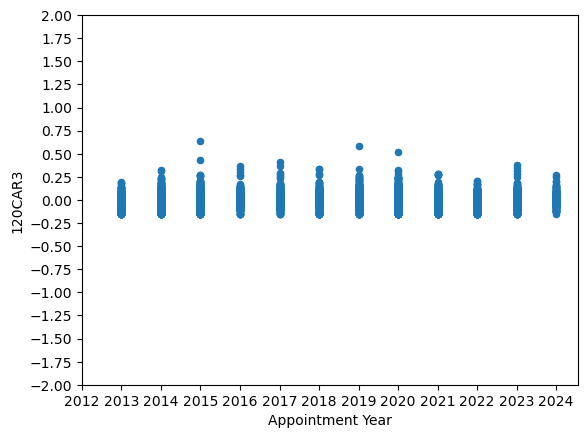

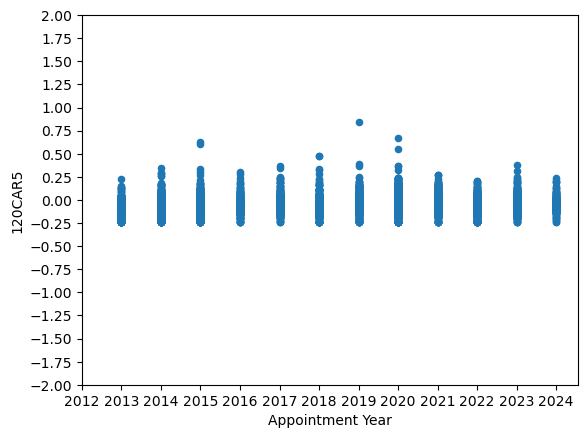

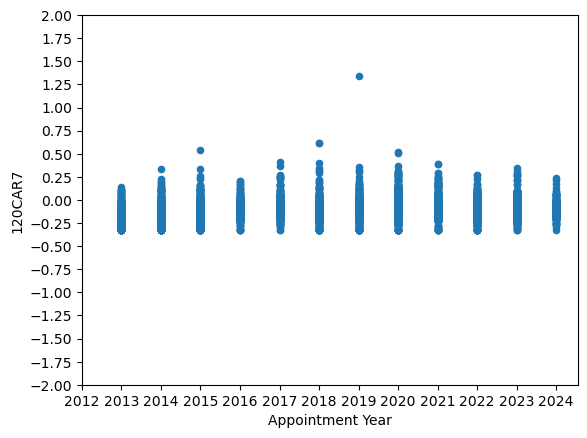

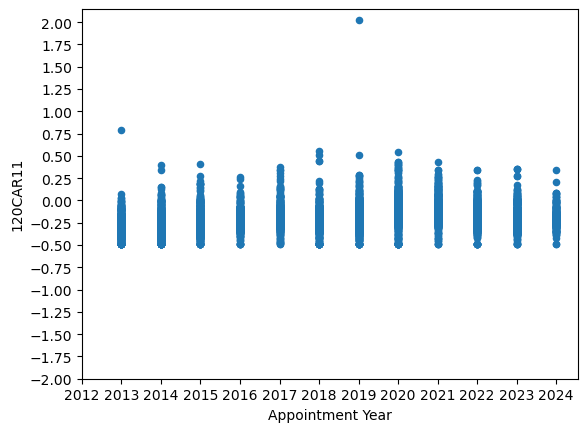

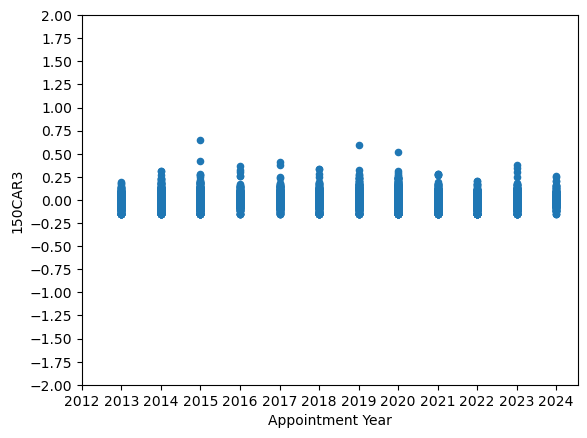

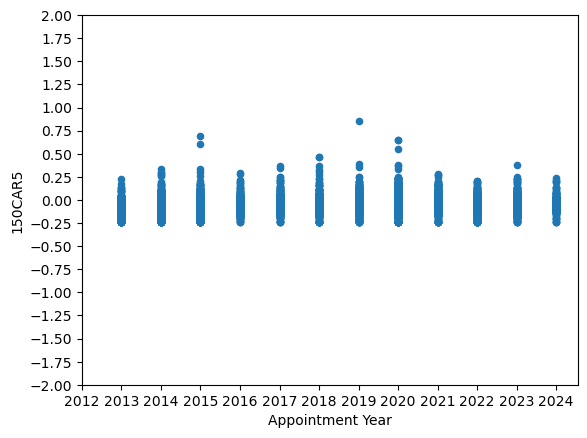

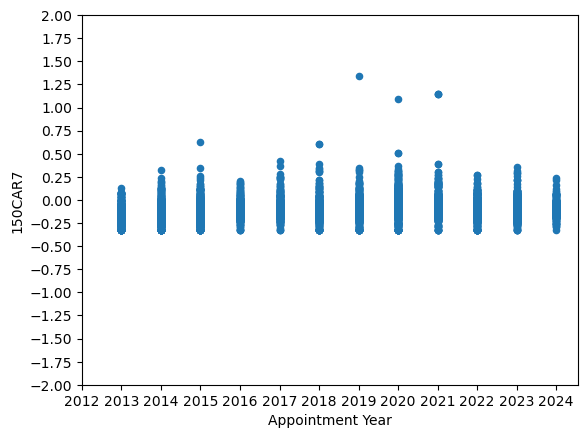

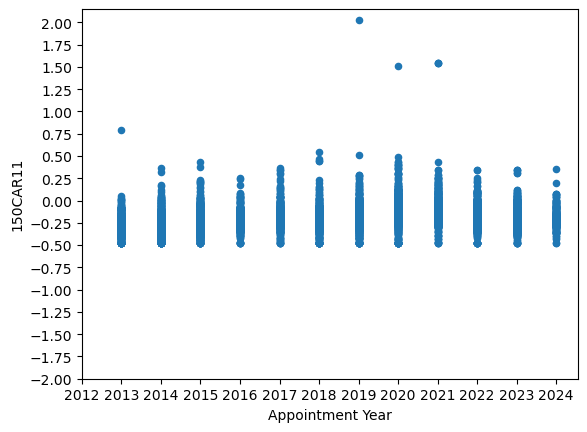

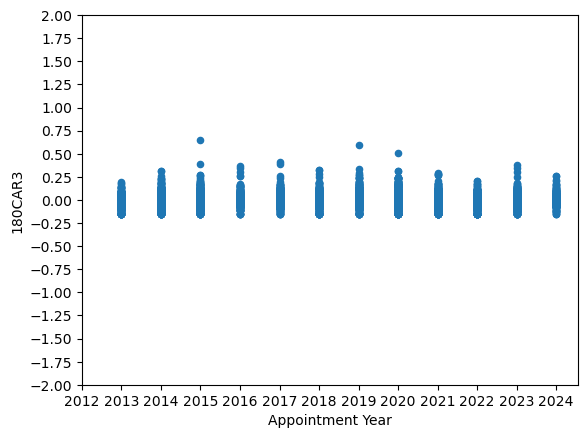

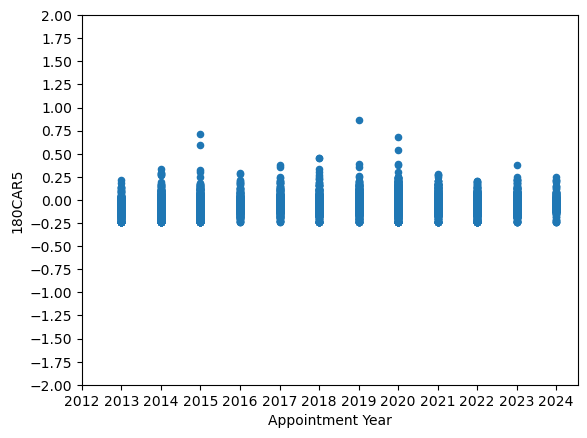

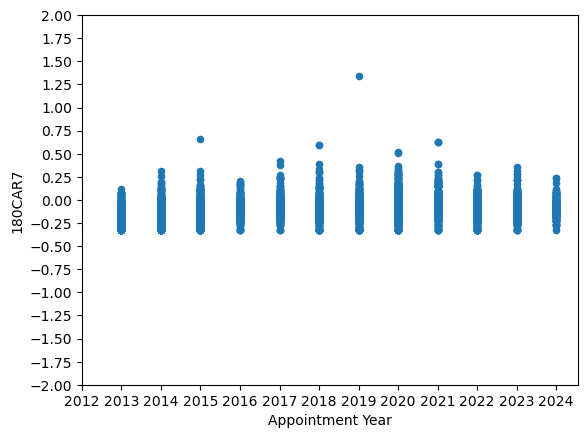

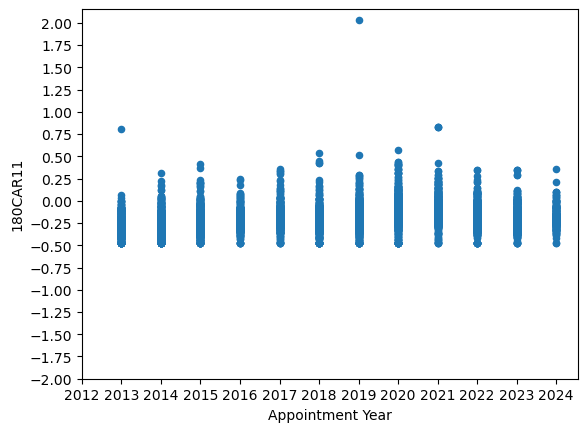

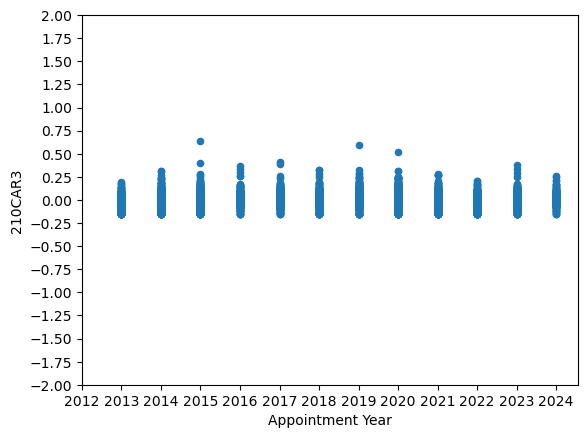

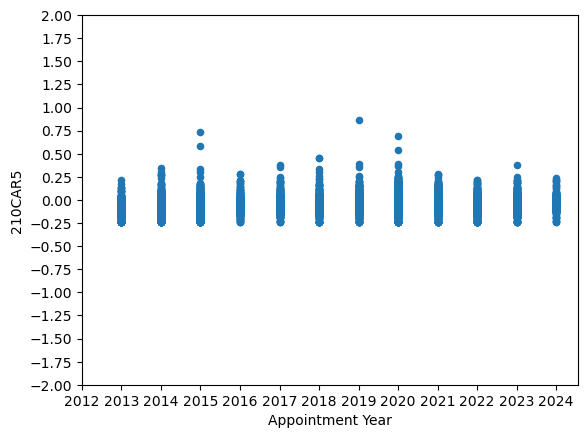

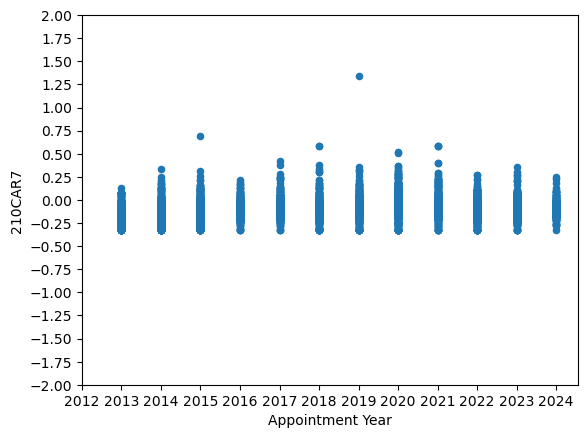

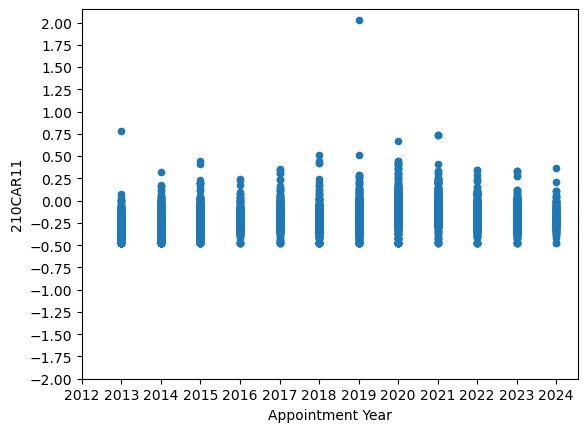

In [15]:
test = psmSampleIndep.copy()

carCol = ["120CAR3", "120CAR5", "120CAR7", "120CAR11", 
          "150CAR3", "150CAR5", "150CAR7", "150CAR11", 
          "180CAR3", "180CAR5", "180CAR7", "180CAR11",
          "210CAR3", "210CAR5", "210CAR7", "210CAR11"]

for car in carCol:
    test[car] = winsorize(test[car].values, limits = [0.01, 0.01]).data
    test[[car, "Appointment Year"]].plot(kind = "scatter", x="Appointment Year", y=car, xticks = np.arange(2012, 2025, step = 1), yticks = np.arange(-2, 2.25, step = 0.25))

In [16]:
test.describe()

,AsOnDate,AsOnYear,Date of Birth,Tenure Valid till,Appointment Date,Cessation Date,PrevLastServed,NextServed,CessationDummy,ReappointDummy,TermStartDummy,TermNumber,AppointDummy,CumOpBalUnc,CumOpBalIndep,CumOpBalNonIndep,CumCloBalUnc,CumCloBalIndep,CumCloBalNonIndep,TermOpBalUnc,TermOpBalIndep,TermOpBalNonIndep,TermOpBalTotal,TermCloBalUnc,TermCloBalIndep,TermCloBalNonIndep,TermCloBalTotal,CompOpBalUnc,CompOpBalIndep,CompOpBalNonIndep,CompOpBalTotal,CompCloBalUnc,CompCloBalIndep,CompCloBalNonIndep,CompCloBalTotal,CloBalTotalXP,CountOtherPastUnclearA,CountOtherPastIndepA,CountOtherPastNonIndepA,CompCountOtherPastTotalA,CountOtherPastUnclearAB,CountOtherPastIndepAB,CountOtherPastNonIndepAB,CompCountOtherPastTotalAB,CountCurrUnclearA,CountCurrIndepA,CountCurrNonIndepA,CompCountCurrTotalA,CountCurrUnclearAB,CountCurrIndepAB,CountCurrNonIndepAB,CompCountCurrTotalAB,IsIndep,IsNonIndep,IsRookie,IsNonRookie,IsCeoMDPosition,IsChairmanPosition,IsCeoMDOccupation,IsChairmanOccupation,IsCeoMD,IsChairman,IsPromoterClassification,IsPromoterBoard,IsPromoter,IsDualityChairmanMD,IsFamilyManager,IsFamilyChairman,IsFamilyChairmanAndCEO,IsRookieIndep,IsRookieNonIndep,IsNonRookieIndep,IsNonRookieNonIndep,IsFemale,Age,TenureInYearsinCompIndep,TenureInYearsinCompTotal,IsFirstTerm,IsFirstTermIndep,IsOneYear,IsOneYearIndep,IsTwoYear,IsTwoYearIndep,IsThreeYear,IsThreeYearIndep,IsRetires5y,IsTermLimitRetirement,IsDefaultTerm,IsBusy,IsTurnOver,HasRetires5y,HasTermLimitRetirement,IsTurnOverIndep,Prowess company code,IsMBA,IsPhD,HasFinanceXP,HasTechXP,HasRelatedIndustryXP,IsExecCurrent,NumExecAll,IsOutsideExecXP,HasExecXP,PublicExecXPDummy,PrivateExecXPDummy,HasPublicExecXP,HasPrivateExecXP,HasTechSkill,HasFinanceSkill,NumSkills,NumFirmsPast,NumIndustryPast,HasCeoMDChairXP,HasConglomerateXP,skilllist_sustainability,skilllist_entrepreneurial,skilllist_compensation,skilllist_conglomerate_experience,skilllist_hr,skilllist_technology,skilllist_finance_accounting,skilllist_governance,skilllist_government_policy,skilllist_international,skilllist_leadership,skilllist_legal,skilllist_marketing,skilllist_risk_management,skilllist_scientific,skilllist_strategic_planning,skilllist_manufacturing_supply_chain,Academic,Manufacturing,Outside Board,Company Business,profile_sustainability,profile_entrepreneurial,profile_compensation,profile_conglomerate_experience,profile_hr,profile_technology,profile_finance_accounting,profile_governance,profile_government_policy,profile_international,profile_leadership,profile_legal,profile_marketing,profile_risk_management,profile_scientific,profile_strategic_planning,profile_manufacturing_supply_chain,committee_sustainability,committee_entrepreneurial,committee_compensation,committee_conglomerate_experience,committee_hr,committee_technology,committee_finance_accounting,committee_governance,committee_government_policy,committee_international,committee_leadership,committee_legal,committee_marketing,committee_risk_management,committee_scientific,committee_strategic_planning,committee_manufacturing_supply_chain,combined_sustainability,combined_entrepreneurial,combined_compensation,combined_conglomerate_experience,combined_hr,combined_technology,combined_finance_accounting,combined_governance,combined_government_policy,combined_international,combined_leadership,combined_legal,combined_marketing,combined_risk_management,combined_scientific,combined_strategic_planning,combined_manufacturing_supply_chain,NumSkills_dummies,Total No.of Board Meetings Held,No.of Meetings Attended,percent_board_absence,ProwessCode,ACP,pct,RF,RMRF,MF,SMB,HML,OLS120_intercept,OLS120_RMRF,OLS120_SMB,OLS120_HML,OLS120_r_squared,OLS120_adjusted_r_squared,OLS120_f_p_value,120CAR3,120CAR5,120CAR7,120CAR11,OLS150_intercept,OLS150_RMRF,OLS150_SMB,OLS150_HML,OLS150_r_squared,OLS150_adjusted_r_squared,OLS150_f_p_value,150CAR3,150CAR5,150CAR7,150CAR11,OLS180_intercept,OLS180_RMRF,OLS180_SMB,OLS180_HML,OLS180_r_squared,OLS180_adjusted_r_squared,OLS180_f_p_value,180CAR3,180CAR5,

### RID

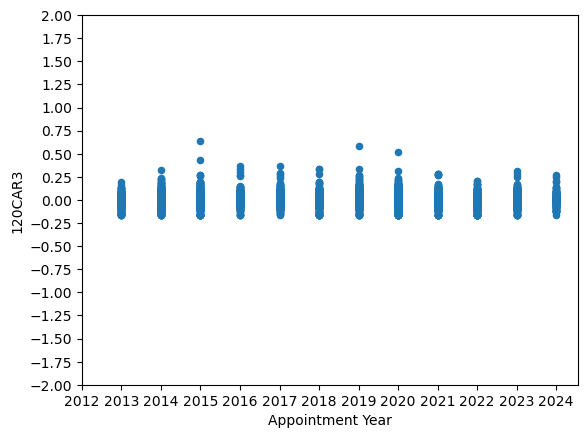

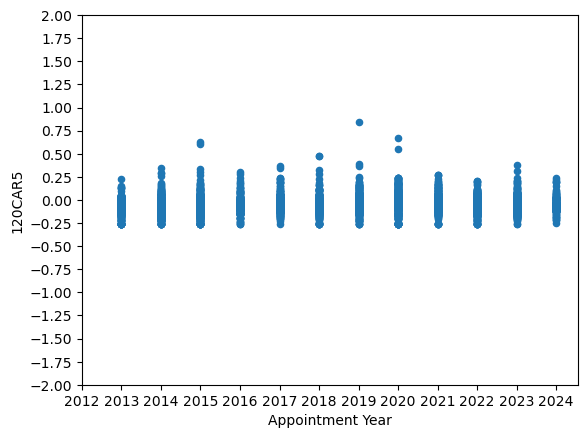

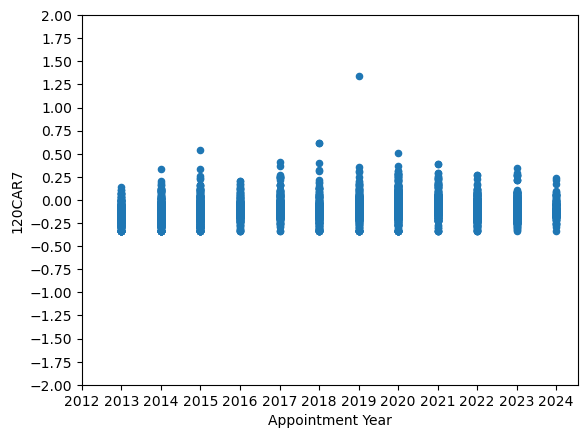

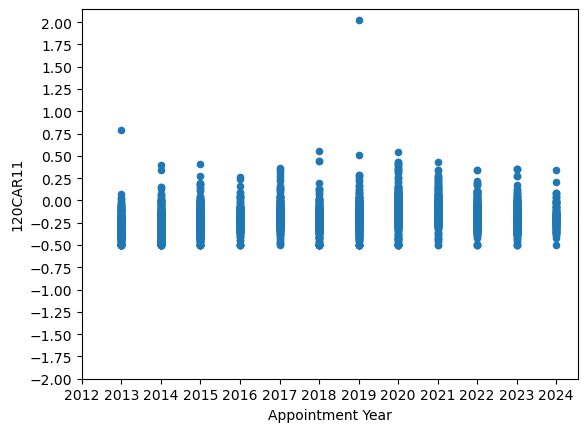

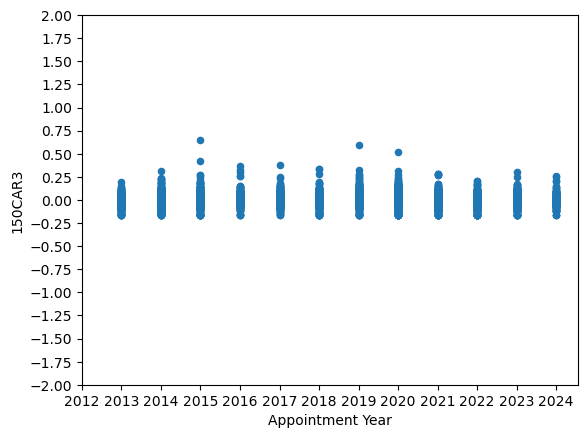

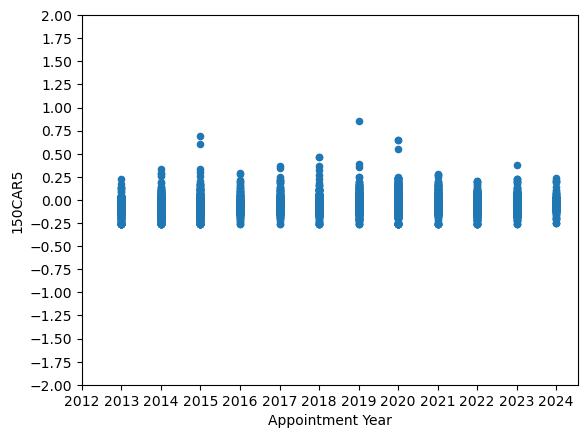

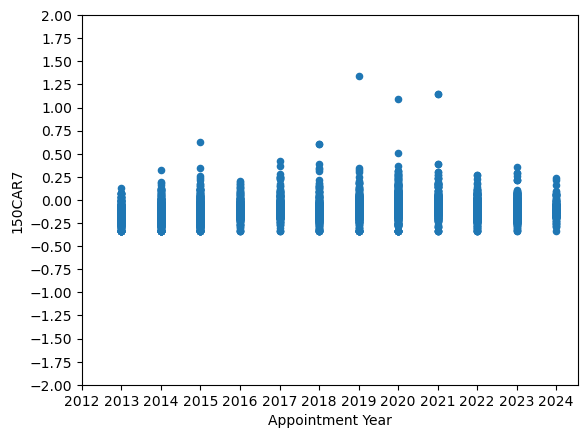

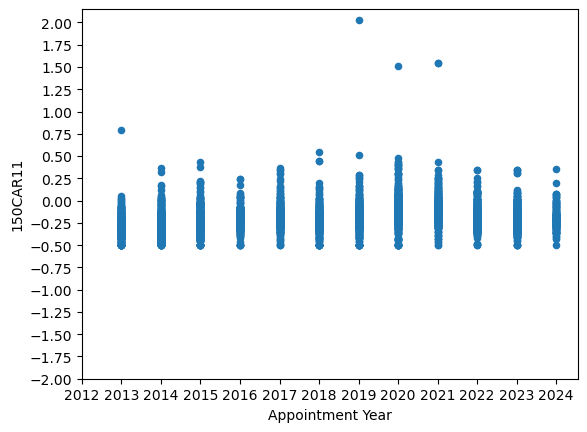

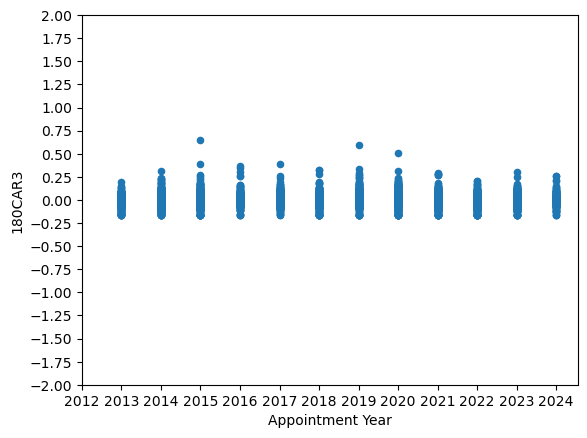

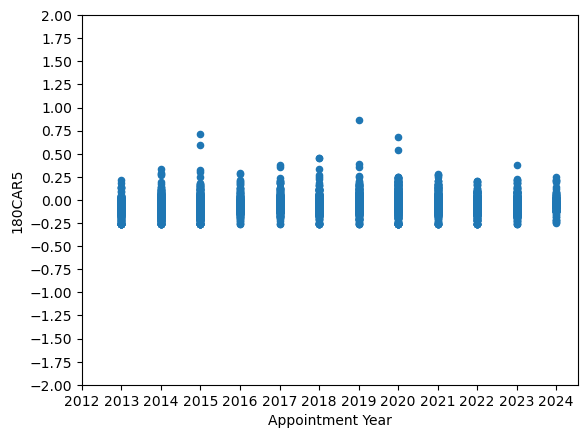

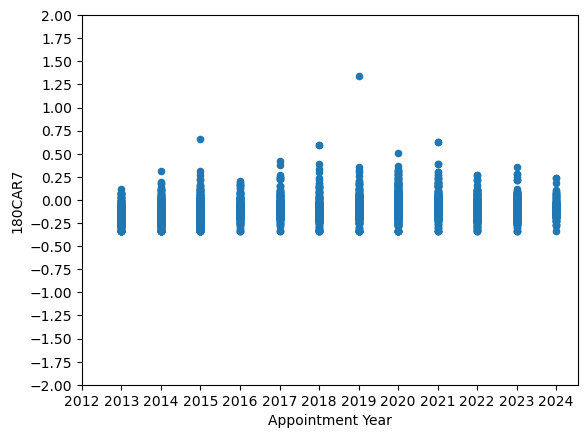

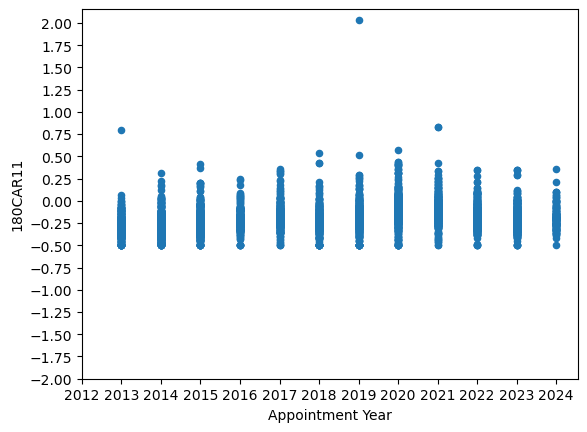

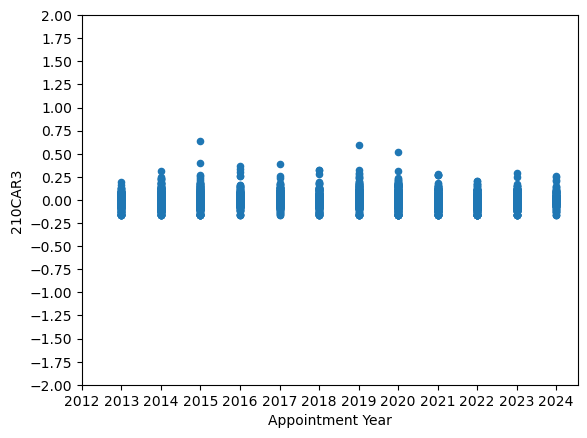

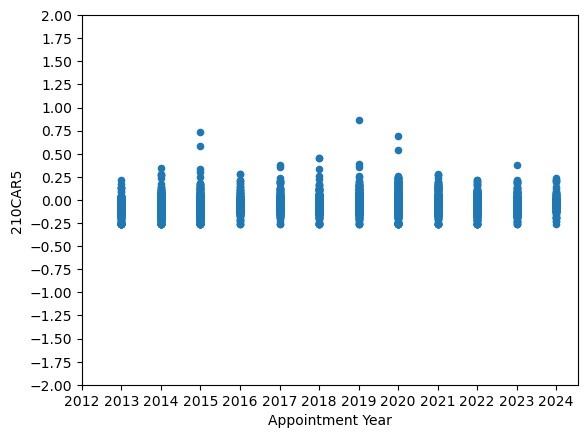

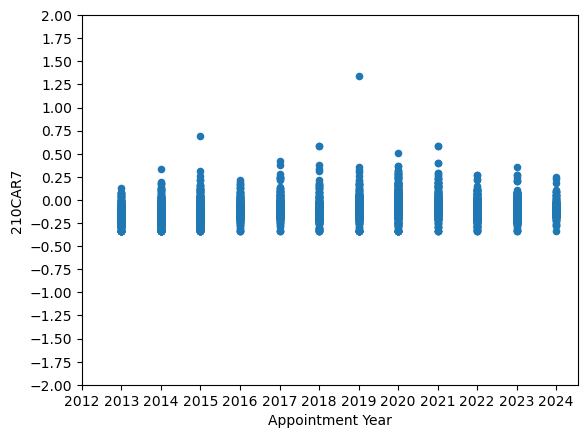

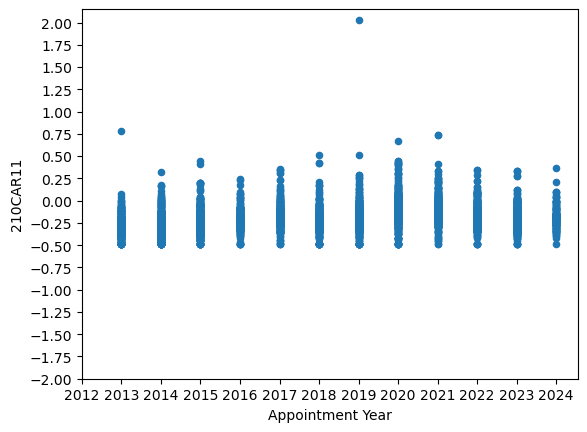

In [17]:
test = psmSampleIndep.loc[ psmSampleIndep["IsRookieIndep"] == 1 ].copy()

carCol = ["120CAR3", "120CAR5", "120CAR7", "120CAR11", 
          "150CAR3", "150CAR5", "150CAR7", "150CAR11", 
          "180CAR3", "180CAR5", "180CAR7", "180CAR11",
          "210CAR3", "210CAR5", "210CAR7", "210CAR11"]

for car in carCol:
    test[car] = winsorize(test[car].values, limits = [0.01, 0.01]).data
    test[[car, "Appointment Year"]].plot(kind = "scatter", x="Appointment Year", y=car, xticks = np.arange(2012, 2025, step = 1), yticks = np.arange(-2, 2.25, step = 0.25))

In [18]:
test.describe()

,AsOnDate,AsOnYear,Date of Birth,Tenure Valid till,Appointment Date,Cessation Date,PrevLastServed,NextServed,CessationDummy,ReappointDummy,TermStartDummy,TermNumber,AppointDummy,CumOpBalUnc,CumOpBalIndep,CumOpBalNonIndep,CumCloBalUnc,CumCloBalIndep,CumCloBalNonIndep,TermOpBalUnc,TermOpBalIndep,TermOpBalNonIndep,TermOpBalTotal,TermCloBalUnc,TermCloBalIndep,TermCloBalNonIndep,TermCloBalTotal,CompOpBalUnc,CompOpBalIndep,CompOpBalNonIndep,CompOpBalTotal,CompCloBalUnc,CompCloBalIndep,CompCloBalNonIndep,CompCloBalTotal,CloBalTotalXP,CountOtherPastUnclearA,CountOtherPastIndepA,CountOtherPastNonIndepA,CompCountOtherPastTotalA,CountOtherPastUnclearAB,CountOtherPastIndepAB,CountOtherPastNonIndepAB,CompCountOtherPastTotalAB,CountCurrUnclearA,CountCurrIndepA,CountCurrNonIndepA,CompCountCurrTotalA,CountCurrUnclearAB,CountCurrIndepAB,CountCurrNonIndepAB,CompCountCurrTotalAB,IsIndep,IsNonIndep,IsRookie,IsNonRookie,IsCeoMDPosition,IsChairmanPosition,IsCeoMDOccupation,IsChairmanOccupation,IsCeoMD,IsChairman,IsPromoterClassification,IsPromoterBoard,IsPromoter,IsDualityChairmanMD,IsFamilyManager,IsFamilyChairman,IsFamilyChairmanAndCEO,IsRookieIndep,IsRookieNonIndep,IsNonRookieIndep,IsNonRookieNonIndep,IsFemale,Age,TenureInYearsinCompIndep,TenureInYearsinCompTotal,IsFirstTerm,IsFirstTermIndep,IsOneYear,IsOneYearIndep,IsTwoYear,IsTwoYearIndep,IsThreeYear,IsThreeYearIndep,IsRetires5y,IsTermLimitRetirement,IsDefaultTerm,IsBusy,IsTurnOver,HasRetires5y,HasTermLimitRetirement,IsTurnOverIndep,Prowess company code,IsMBA,IsPhD,HasFinanceXP,HasTechXP,HasRelatedIndustryXP,IsExecCurrent,NumExecAll,IsOutsideExecXP,HasExecXP,PublicExecXPDummy,PrivateExecXPDummy,HasPublicExecXP,HasPrivateExecXP,HasTechSkill,HasFinanceSkill,NumSkills,NumFirmsPast,NumIndustryPast,HasCeoMDChairXP,HasConglomerateXP,skilllist_sustainability,skilllist_entrepreneurial,skilllist_compensation,skilllist_conglomerate_experience,skilllist_hr,skilllist_technology,skilllist_finance_accounting,skilllist_governance,skilllist_government_policy,skilllist_international,skilllist_leadership,skilllist_legal,skilllist_marketing,skilllist_risk_management,skilllist_scientific,skilllist_strategic_planning,skilllist_manufacturing_supply_chain,Academic,Manufacturing,Outside Board,Company Business,profile_sustainability,profile_entrepreneurial,profile_compensation,profile_conglomerate_experience,profile_hr,profile_technology,profile_finance_accounting,profile_governance,profile_government_policy,profile_international,profile_leadership,profile_legal,profile_marketing,profile_risk_management,profile_scientific,profile_strategic_planning,profile_manufacturing_supply_chain,committee_sustainability,committee_entrepreneurial,committee_compensation,committee_conglomerate_experience,committee_hr,committee_technology,committee_finance_accounting,committee_governance,committee_government_policy,committee_international,committee_leadership,committee_legal,committee_marketing,committee_risk_management,committee_scientific,committee_strategic_planning,committee_manufacturing_supply_chain,combined_sustainability,combined_entrepreneurial,combined_compensation,combined_conglomerate_experience,combined_hr,combined_technology,combined_finance_accounting,combined_governance,combined_government_policy,combined_international,combined_leadership,combined_legal,combined_marketing,combined_risk_management,combined_scientific,combined_strategic_planning,combined_manufacturing_supply_chain,NumSkills_dummies,Total No.of Board Meetings Held,No.of Meetings Attended,percent_board_absence,ProwessCode,ACP,pct,RF,RMRF,MF,SMB,HML,OLS120_intercept,OLS120_RMRF,OLS120_SMB,OLS120_HML,OLS120_r_squared,OLS120_adjusted_r_squared,OLS120_f_p_value,120CAR3,120CAR5,120CAR7,120CAR11,OLS150_intercept,OLS150_RMRF,OLS150_SMB,OLS150_HML,OLS150_r_squared,OLS150_adjusted_r_squared,OLS150_f_p_value,150CAR3,150CAR5,150CAR7,150CAR11,OLS180_intercept,OLS180_RMRF,OLS180_SMB,OLS180_HML,OLS180_r_squared,OLS180_adjusted_r_squared,OLS180_f_p_value,180CAR3,180CAR5,

In [19]:
test.loc[ test["120CAR5"] >= 0.75]

,Symbol,Company,AsOnDate,AsOnYear,ISIN,Person Code,Director Salutation,Director First Name,Director Middle Name,Director Surname,Date of Birth,Gender,Nationality,Member of Civil Services,Promoter Director (Yes/No),Position on Board,Independent (Yes/No),Education1,Education2,Education3,Education4,Education5,Education6,Education7,Education8,Education9,Education10,Skills/Competencies,Occupation,Cessation Reason,Other Directorship 1,Other Directorship 2,Other Directorship 3,Other Directorship 4,Other Directorship 5,Other Directorship 6,Other Directorship 7,Other Directorship 8,Other Directorship 9,Other Directorship 10,Other Directorship 11,Other Directorship 12,Other Directorship 13,Other Directorship 14,Other Directorship 15,Brief Profile,Tenure Valid till,Indep,Appointment Date,Cessation Date,PrevLastServed,NextServed,CessationDummy,ReappointDummy,TermStartDummy,TermNumber,AppointDummy,CumOpBalUnc,CumOpBalIndep,CumOpBalNonIndep,CumCloBalUnc,CumCloBalIndep,CumCloBalNonIndep,TermOpBalUnc,TermOpBalIndep,TermOpBalNonIndep,TermOpBalTotal,TermCloBalUnc,TermCloBalIndep,TermCloBalNonIndep,TermCloBalTotal,CompOpBalUnc,CompOpBalIndep,CompOpBalNonIndep,CompOpBalTotal,CompCloBalUnc,CompCloBalIndep,CompCloBalNonIndep,CompCloBalTotal,CloBalTotalXP,AllPastDirect,CurrDirectA,CurrDirectAB,PastSiezedDirectA,PastSiezedDirectAB,CountOtherPastUnclearA,CountOtherPastIndepA,CountOtherPastNonIndepA,CompCountOtherPastTotalA,CountOtherPastUnclearAB,CountOtherPastIndepAB,CountOtherPastNonIndepAB,CompCountOtherPastTotalAB,CountCurrUnclearA,CountCurrIndepA,CountCurrNonIndepA,CompCountCurrTotalA,CountCurrUnclearAB,CountCurrIndepAB,CountCurrNonIndepAB,CompCountCurrTotalAB,Rookie,IsIndep,IsNonIndep,IsRookie,IsNonRookie,IsCeoMDPosition,IsChairmanPosition,IsCeoMDOccupation,IsChairmanOccupation,IsCeoMD,IsChairman,IsPromoterClassification,IsPromoterBoard,IsPromoter,IsDualityChairmanMD,IsFamilyManager,IsFamilyChairman,IsFamilyChairmanAndCEO,IsRookieIndep,IsRookieNonIndep,IsNonRookieIndep,IsNonRookieNonIndep,IsFemale,Age,TenureInYearsinCompIndep,TenureInYearsinCompTotal,IsFirstTerm,IsFirstTermIndep,IsOneYear,IsOneYearIndep,IsTwoYear,IsTwoYearIndep,IsThreeYear,IsThreeYearIndep,IsRetires5y,IsTermLimitRetirement,IsDefaultTerm,IsBusy,IsTurnOver,HasRetires5y,HasTermLimitRetirement,IsTurnOverIndep,NSE symbol,NIC code,Entity type,Ownership group,Prowess company code,CompanyName,Skills,EducationAll,IsMBA,IsPhD,AllPastDirectNIC,CurrDirectANIC,CurrDirectABNIC,AllNIC,AllNIC_Industry,HasFinanceXP,HasTechXP,HasRelatedIndustryXP,IsExecCurrent,NumExecAll,IsOutsideExecXP,HasExecXP,PublicExecXPDummy,PrivateExecXPDummy,HasPublicExecXP,HasPrivateExecXP,SkillsInPositiononBoard,SkillsInOccupation,AllSkills,HasTechSkill,HasFinanceSkill,FirmsPast,NumSkills,NumFirmsPast,NumIndustryPast,HasCeoMDChairXP,HasConglomerateXP,skilllist_sustainability,skilllist_entrepreneurial,skilllist_compensation,skilllist_conglomerate_experience,skilllist_hr,skilllist_technology,skilllist_finance_accounting,skilllist_governance,skilllist_government_policy,skilllist_international,skilllist_leadership,skilllist_legal,skilllist_marketing,skilllist_risk_management,skilllist_scientific,skilllist_strategic_planning,skilllist_manufacturing_supply_chain,Academic,Manufacturing,Outside Board,Company Business,profile_sustainability,profile_entrepreneurial,profile_compensation,profile_conglomerate_experience,profile_hr,profile_technology,profile_finance_accounting,profile_governance,profile_government_policy,profile_international,profile_leadership,profile_legal,profile_marketing,profile_risk_management,profile_scientific,profile_strategic_planning,profile_manufacturing_supply_chain,Committee Name,committee_sustainability,committee_entrepreneurial,committee_compensation,committee_conglomerate_experience,committee_hr,committee_technology,committee_finance_accounting,committee_governance,committee_government_policy,committee_international,committee_leadership,committee_legal,committee_marketing,committee_risk_management,co

### Non RID

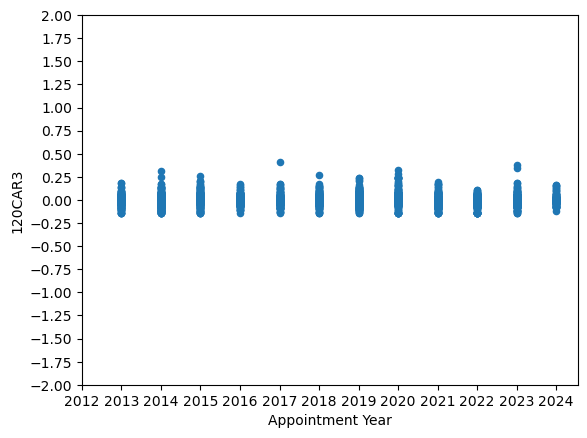

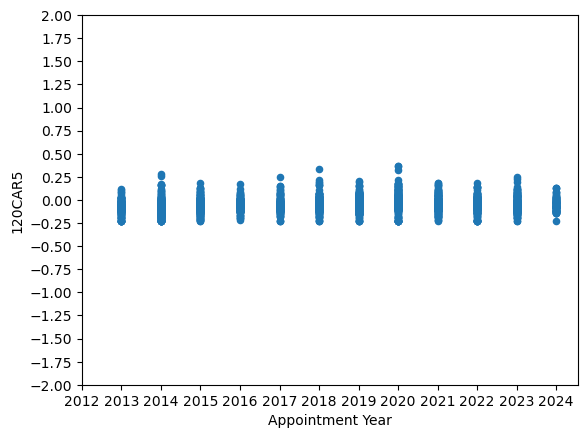

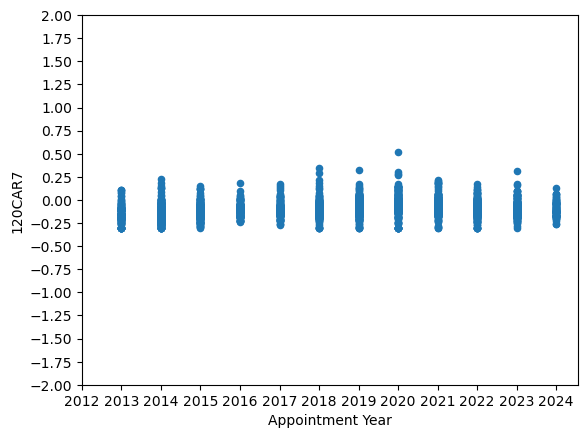

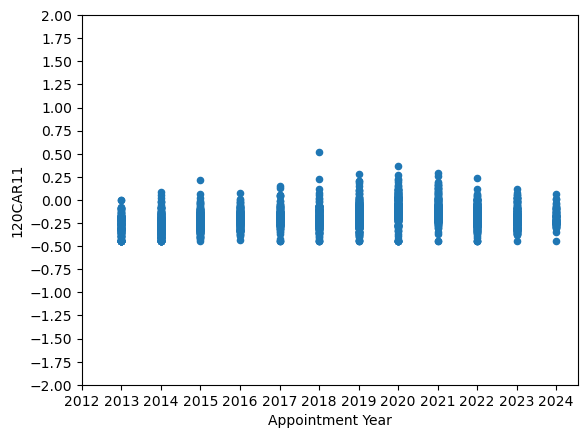

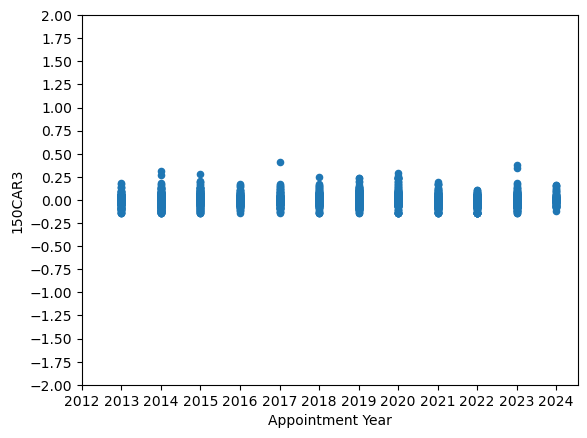

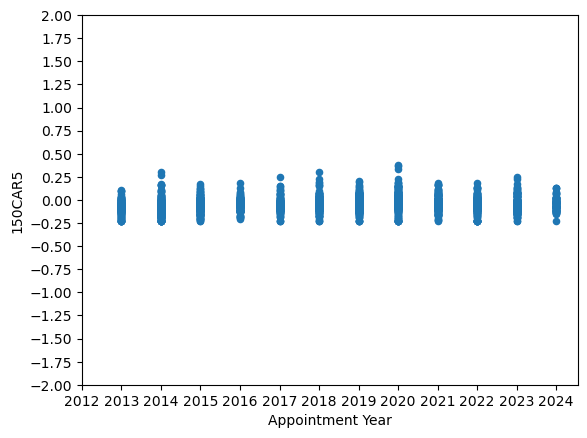

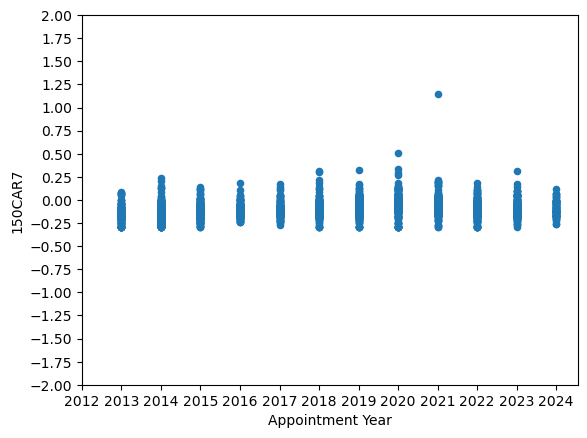

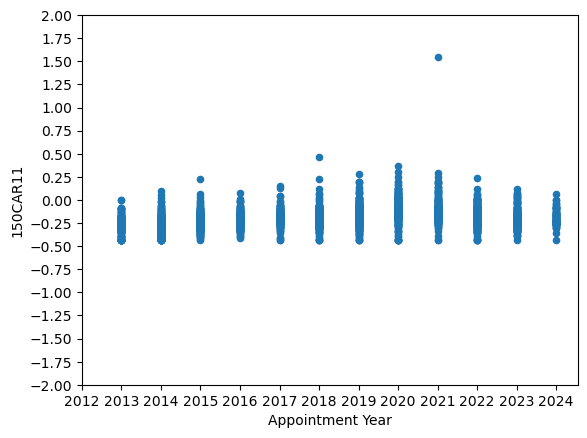

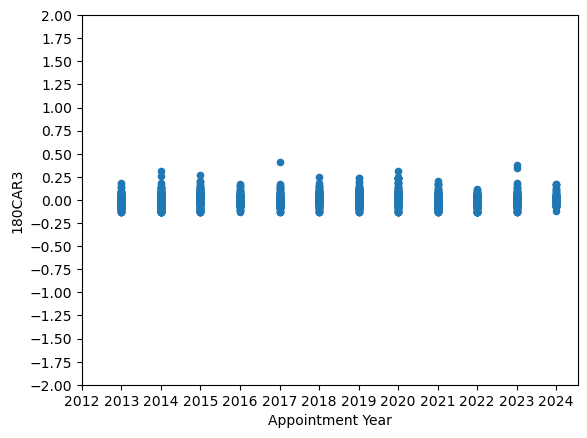

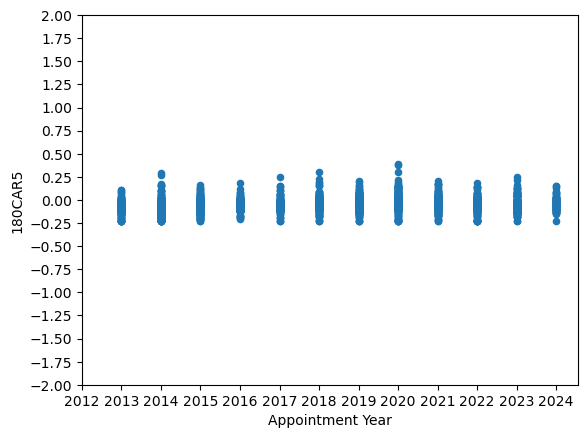

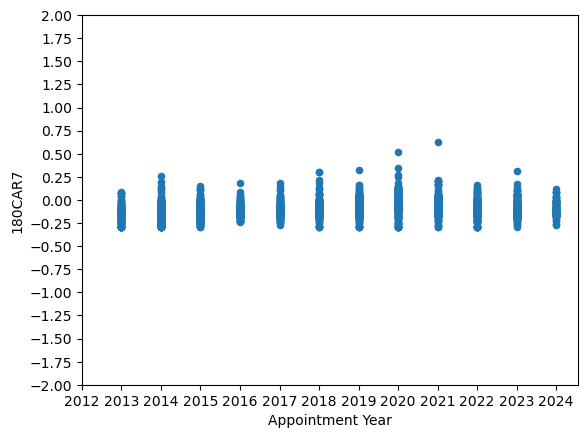

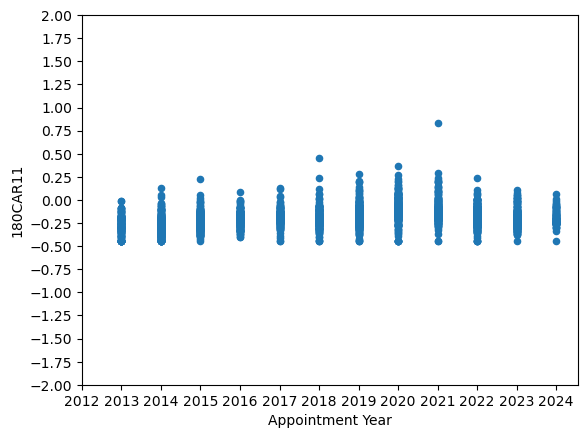

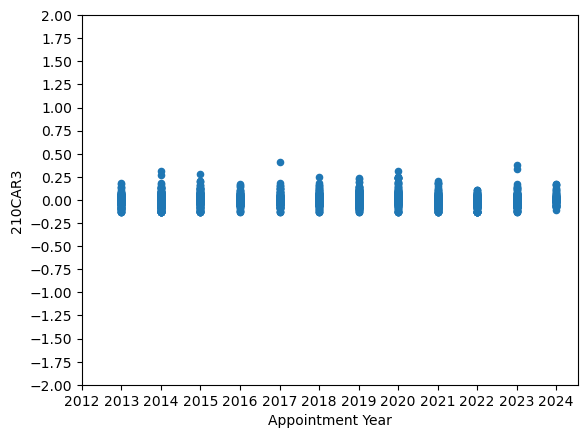

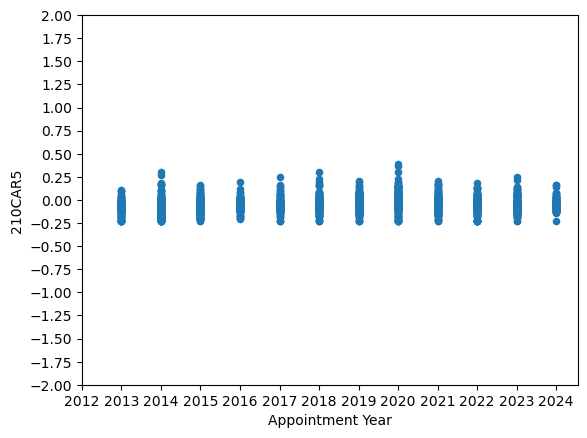

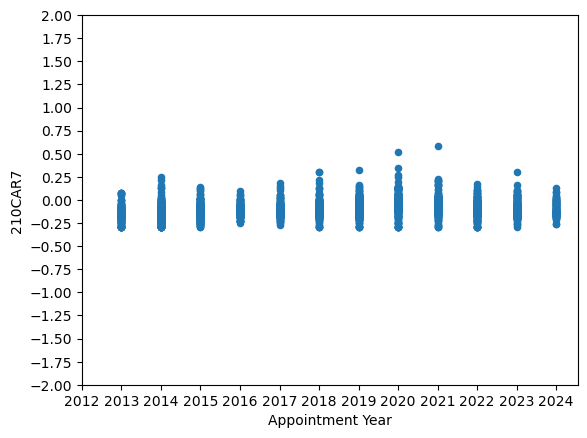

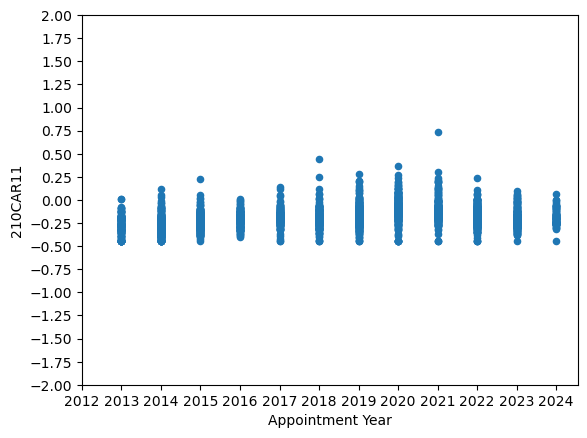

In [20]:
test = psmSampleIndep.loc[ psmSampleIndep["IsRookieIndep"] == 0 ].copy()

carCol = ["120CAR3", "120CAR5", "120CAR7", "120CAR11", 
          "150CAR3", "150CAR5", "150CAR7", "150CAR11", 
          "180CAR3", "180CAR5", "180CAR7", "180CAR11",
          "210CAR3", "210CAR5", "210CAR7", "210CAR11"]

for car in carCol:
    test[car] = winsorize(test[car].values, limits = [0.01, 0.01]).data
    test[[car, "Appointment Year"]].plot(kind = "scatter", x="Appointment Year", y=car, xticks = np.arange(2012, 2025, step = 1), yticks = np.arange(-2, 2.25, step = 0.25))

In [21]:
test.describe()

,AsOnDate,AsOnYear,Date of Birth,Tenure Valid till,Appointment Date,Cessation Date,PrevLastServed,NextServed,CessationDummy,ReappointDummy,TermStartDummy,TermNumber,AppointDummy,CumOpBalUnc,CumOpBalIndep,CumOpBalNonIndep,CumCloBalUnc,CumCloBalIndep,CumCloBalNonIndep,TermOpBalUnc,TermOpBalIndep,TermOpBalNonIndep,TermOpBalTotal,TermCloBalUnc,TermCloBalIndep,TermCloBalNonIndep,TermCloBalTotal,CompOpBalUnc,CompOpBalIndep,CompOpBalNonIndep,CompOpBalTotal,CompCloBalUnc,CompCloBalIndep,CompCloBalNonIndep,CompCloBalTotal,CloBalTotalXP,CountOtherPastUnclearA,CountOtherPastIndepA,CountOtherPastNonIndepA,CompCountOtherPastTotalA,CountOtherPastUnclearAB,CountOtherPastIndepAB,CountOtherPastNonIndepAB,CompCountOtherPastTotalAB,CountCurrUnclearA,CountCurrIndepA,CountCurrNonIndepA,CompCountCurrTotalA,CountCurrUnclearAB,CountCurrIndepAB,CountCurrNonIndepAB,CompCountCurrTotalAB,IsIndep,IsNonIndep,IsRookie,IsNonRookie,IsCeoMDPosition,IsChairmanPosition,IsCeoMDOccupation,IsChairmanOccupation,IsCeoMD,IsChairman,IsPromoterClassification,IsPromoterBoard,IsPromoter,IsDualityChairmanMD,IsFamilyManager,IsFamilyChairman,IsFamilyChairmanAndCEO,IsRookieIndep,IsRookieNonIndep,IsNonRookieIndep,IsNonRookieNonIndep,IsFemale,Age,TenureInYearsinCompIndep,TenureInYearsinCompTotal,IsFirstTerm,IsFirstTermIndep,IsOneYear,IsOneYearIndep,IsTwoYear,IsTwoYearIndep,IsThreeYear,IsThreeYearIndep,IsRetires5y,IsTermLimitRetirement,IsDefaultTerm,IsBusy,IsTurnOver,HasRetires5y,HasTermLimitRetirement,IsTurnOverIndep,Prowess company code,IsMBA,IsPhD,HasFinanceXP,HasTechXP,HasRelatedIndustryXP,IsExecCurrent,NumExecAll,IsOutsideExecXP,HasExecXP,PublicExecXPDummy,PrivateExecXPDummy,HasPublicExecXP,HasPrivateExecXP,HasTechSkill,HasFinanceSkill,NumSkills,NumFirmsPast,NumIndustryPast,HasCeoMDChairXP,HasConglomerateXP,skilllist_sustainability,skilllist_entrepreneurial,skilllist_compensation,skilllist_conglomerate_experience,skilllist_hr,skilllist_technology,skilllist_finance_accounting,skilllist_governance,skilllist_government_policy,skilllist_international,skilllist_leadership,skilllist_legal,skilllist_marketing,skilllist_risk_management,skilllist_scientific,skilllist_strategic_planning,skilllist_manufacturing_supply_chain,Academic,Manufacturing,Outside Board,Company Business,profile_sustainability,profile_entrepreneurial,profile_compensation,profile_conglomerate_experience,profile_hr,profile_technology,profile_finance_accounting,profile_governance,profile_government_policy,profile_international,profile_leadership,profile_legal,profile_marketing,profile_risk_management,profile_scientific,profile_strategic_planning,profile_manufacturing_supply_chain,committee_sustainability,committee_entrepreneurial,committee_compensation,committee_conglomerate_experience,committee_hr,committee_technology,committee_finance_accounting,committee_governance,committee_government_policy,committee_international,committee_leadership,committee_legal,committee_marketing,committee_risk_management,committee_scientific,committee_strategic_planning,committee_manufacturing_supply_chain,combined_sustainability,combined_entrepreneurial,combined_compensation,combined_conglomerate_experience,combined_hr,combined_technology,combined_finance_accounting,combined_governance,combined_government_policy,combined_international,combined_leadership,combined_legal,combined_marketing,combined_risk_management,combined_scientific,combined_strategic_planning,combined_manufacturing_supply_chain,NumSkills_dummies,Total No.of Board Meetings Held,No.of Meetings Attended,percent_board_absence,ProwessCode,ACP,pct,RF,RMRF,MF,SMB,HML,OLS120_intercept,OLS120_RMRF,OLS120_SMB,OLS120_HML,OLS120_r_squared,OLS120_adjusted_r_squared,OLS120_f_p_value,120CAR3,120CAR5,120CAR7,120CAR11,OLS150_intercept,OLS150_RMRF,OLS150_SMB,OLS150_HML,OLS150_r_squared,OLS150_adjusted_r_squared,OLS150_f_p_value,150CAR3,150CAR5,150CAR7,150CAR11,OLS180_intercept,OLS180_RMRF,OLS180_SMB,OLS180_HML,OLS180_r_squared,OLS180_adjusted_r_squared,OLS180_f_p_value,180CAR3,180CAR5,

In [22]:
test.loc[ test["180CAR11"] >= 2]

,Symbol,Company,AsOnDate,AsOnYear,ISIN,Person Code,Director Salutation,Director First Name,Director Middle Name,Director Surname,Date of Birth,Gender,Nationality,Member of Civil Services,Promoter Director (Yes/No),Position on Board,Independent (Yes/No),Education1,Education2,Education3,Education4,Education5,Education6,Education7,Education8,Education9,Education10,Skills/Competencies,Occupation,Cessation Reason,Other Directorship 1,Other Directorship 2,Other Directorship 3,Other Directorship 4,Other Directorship 5,Other Directorship 6,Other Directorship 7,Other Directorship 8,Other Directorship 9,Other Directorship 10,Other Directorship 11,Other Directorship 12,Other Directorship 13,Other Directorship 14,Other Directorship 15,Brief Profile,Tenure Valid till,Indep,Appointment Date,Cessation Date,PrevLastServed,NextServed,CessationDummy,ReappointDummy,TermStartDummy,TermNumber,AppointDummy,CumOpBalUnc,CumOpBalIndep,CumOpBalNonIndep,CumCloBalUnc,CumCloBalIndep,CumCloBalNonIndep,TermOpBalUnc,TermOpBalIndep,TermOpBalNonIndep,TermOpBalTotal,TermCloBalUnc,TermCloBalIndep,TermCloBalNonIndep,TermCloBalTotal,CompOpBalUnc,CompOpBalIndep,CompOpBalNonIndep,CompOpBalTotal,CompCloBalUnc,CompCloBalIndep,CompCloBalNonIndep,CompCloBalTotal,CloBalTotalXP,AllPastDirect,CurrDirectA,CurrDirectAB,PastSiezedDirectA,PastSiezedDirectAB,CountOtherPastUnclearA,CountOtherPastIndepA,CountOtherPastNonIndepA,CompCountOtherPastTotalA,CountOtherPastUnclearAB,CountOtherPastIndepAB,CountOtherPastNonIndepAB,CompCountOtherPastTotalAB,CountCurrUnclearA,CountCurrIndepA,CountCurrNonIndepA,CompCountCurrTotalA,CountCurrUnclearAB,CountCurrIndepAB,CountCurrNonIndepAB,CompCountCurrTotalAB,Rookie,IsIndep,IsNonIndep,IsRookie,IsNonRookie,IsCeoMDPosition,IsChairmanPosition,IsCeoMDOccupation,IsChairmanOccupation,IsCeoMD,IsChairman,IsPromoterClassification,IsPromoterBoard,IsPromoter,IsDualityChairmanMD,IsFamilyManager,IsFamilyChairman,IsFamilyChairmanAndCEO,IsRookieIndep,IsRookieNonIndep,IsNonRookieIndep,IsNonRookieNonIndep,IsFemale,Age,TenureInYearsinCompIndep,TenureInYearsinCompTotal,IsFirstTerm,IsFirstTermIndep,IsOneYear,IsOneYearIndep,IsTwoYear,IsTwoYearIndep,IsThreeYear,IsThreeYearIndep,IsRetires5y,IsTermLimitRetirement,IsDefaultTerm,IsBusy,IsTurnOver,HasRetires5y,HasTermLimitRetirement,IsTurnOverIndep,NSE symbol,NIC code,Entity type,Ownership group,Prowess company code,CompanyName,Skills,EducationAll,IsMBA,IsPhD,AllPastDirectNIC,CurrDirectANIC,CurrDirectABNIC,AllNIC,AllNIC_Industry,HasFinanceXP,HasTechXP,HasRelatedIndustryXP,IsExecCurrent,NumExecAll,IsOutsideExecXP,HasExecXP,PublicExecXPDummy,PrivateExecXPDummy,HasPublicExecXP,HasPrivateExecXP,SkillsInPositiononBoard,SkillsInOccupation,AllSkills,HasTechSkill,HasFinanceSkill,FirmsPast,NumSkills,NumFirmsPast,NumIndustryPast,HasCeoMDChairXP,HasConglomerateXP,skilllist_sustainability,skilllist_entrepreneurial,skilllist_compensation,skilllist_conglomerate_experience,skilllist_hr,skilllist_technology,skilllist_finance_accounting,skilllist_governance,skilllist_government_policy,skilllist_international,skilllist_leadership,skilllist_legal,skilllist_marketing,skilllist_risk_management,skilllist_scientific,skilllist_strategic_planning,skilllist_manufacturing_supply_chain,Academic,Manufacturing,Outside Board,Company Business,profile_sustainability,profile_entrepreneurial,profile_compensation,profile_conglomerate_experience,profile_hr,profile_technology,profile_finance_accounting,profile_governance,profile_government_policy,profile_international,profile_leadership,profile_legal,profile_marketing,profile_risk_management,profile_scientific,profile_strategic_planning,profile_manufacturing_supply_chain,Committee Name,committee_sustainability,committee_entrepreneurial,committee_compensation,committee_conglomerate_experience,committee_hr,committee_technology,committee_finance_accounting,committee_governance,committee_government_policy,committee_international,committee_leadership,committee_legal,committee_marketing,committee_risk_management,co

## Panel A: Whole Sample

### Mean Difference

In [23]:
carCol = ["120CAR3", "120CAR5", "120CAR7", "120CAR11", 
          "150CAR3", "150CAR5", "150CAR7", "150CAR11", 
          "180CAR3", "180CAR5", "180CAR7", "180CAR11",
          "210CAR3", "210CAR5", "210CAR7", "210CAR11"]

exog_var = None
depVar = None
controlVars = None

for car in carCol:
    sample = psmSampleIndep.dropna(subset = car).reset_index(drop=True).copy()
    MeanDiffTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)



120CAR3 :


T Statistic: -0.7012133795375071  P Value: 0.48319577938234126
Treated Mean: -0.0015958588373771053  Control Mean: -0.000614373095883205  Diff: -0.0009814857414939004
Treated Median: -0.00454644924168272  Control Median: -0.003441012194210072  Diff: -0.0011054370474726481
Treated N: 5477 ; Control N: 2899
[treated unique =  5477 ] [control unique =  2899 ]




120CAR5 :


T Statistic: -0.5994526500779813  P Value: 0.548892213166075
Treated Mean: -0.050935179337656  Control Mean: -0.04989004902871975  Diff: -0.0010451303089362499
Treated Median: -0.0528234272061148  Control Median: -0.052081373029448305  Diff: -0.0007420541766664929
Treated N: 5475 ; Control N: 2897
[treated unique =  5475 ] [control unique =  2897 ]




120CAR7 :


T Statistic: -0.985177367094823  P Value: 0.3245736695742013
Treated Mean: -0.09987077787135107  Control Mean: -0.09780606981234768  Diff: -0.002064708059003384
Treated Median: -0.0994318877184087  Control Median: -0.09826060536631559  Diff: -0

In [24]:
### PSM without replacement
# PsmNonReplac(psmSampleIndep, "RookieIndepAppointDummy", controlVars, "ln_TobinQ_longborrowincl2", dirFirm)

### One Sample T Test

In [25]:
carCol = ["120CAR3", "120CAR5", "120CAR7", "120CAR11", 
          "150CAR3", "150CAR5", "150CAR7", "150CAR11", 
          "180CAR3", "180CAR5", "180CAR7", "180CAR11",
          "210CAR3", "210CAR5", "210CAR7", "210CAR11"]

exog_var = None
depVar = None
controlVars = None

for car in carCol:
    sample1 = psmSampleIndep.loc[psmSampleIndep["IsRookieIndep"] == 1].copy()
    print("Rookie Independent Directors:")
    sample = sample1.dropna(subset = car).reset_index(drop=True).copy()
    OneSampleTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)

    sample2 = psmSampleIndep.loc[psmSampleIndep["IsRookieIndep"] == 0].copy()
    print("Non Rookie Independent Directors:")
    sample = sample2.dropna(subset = car).reset_index(drop=True).copy()
    OneSampleTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)


Rookie Independent Directors:


120CAR3 :


T Statistic: -1.8436347981370118  P Value: 0.06529037890906159
Mean: -0.0016018073939806374
Median: -0.00454644924168272
N: 5477


Non Rookie Independent Directors:


120CAR3 :


T Statistic: -0.48902467104846353  P Value: 0.6248612374045552
Mean: -0.0005328366379357241
Median: -0.003441012194210072
N: 2899


Rookie Independent Directors:


120CAR5 :


T Statistic: -46.31616972549349  P Value: 0.0
Mean: -0.050894461529034624
Median: -0.0528234272061148
N: 5475


Non Rookie Independent Directors:


120CAR5 :


T Statistic: -37.345569270818274  P Value: 1.58309217940894e-249
Mean: -0.049931750449468564
Median: -0.052081373029448305
N: 2897


Rookie Independent Directors:


120CAR7 :


T Statistic: -74.37232731331427  P Value: 0.0
Mean: -0.09961362757180581
Median: -0.0994318877184087
N: 5473


Non Rookie Independent Directors:


120CAR7 :


T Statistic: -61.270676992827944  P Value: 0.0
Mean: -0.09811007060173782
Median: -0.09826060536631559
N:

## Panel B: Unique skills dummy

### Mean Difference: RID vs NRID

In [26]:
carCol = ["120CAR3", "120CAR5", "120CAR7", "120CAR11", 
          "150CAR3", "150CAR5", "150CAR7", "150CAR11", 
          "180CAR3", "180CAR5", "180CAR7", "180CAR11",
          "210CAR3", "210CAR5", "210CAR7", "210CAR11"]

exog_var = None
depVar = None
controlVars = None

for car in carCol:
    print("No unique skills:")
    sample = psmSampleIndep.loc[psmSampleIndep["NumSkills_dummies"] == 0].dropna(subset = car).reset_index(drop=True).copy()
    MeanDiffTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)

    print("At least one unique skill:")
    sample = psmSampleIndep.loc[psmSampleIndep["NumSkills_dummies"] != 0].dropna(subset = car).reset_index(drop=True).copy()
    MeanDiffTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)

No unique skills:


120CAR3 :


T Statistic: -0.1386673484554432  P Value: 0.8907108903476597
Treated Mean: -0.0008854413663343408  Control Mean: 0.0008994341035548813  Diff: -0.0017848754698892222
Treated Median: -0.0006647794919680122  Control Median: -0.014799707749099424  Diff: 0.014134928257131411
Treated N: 215 ; Control N: 22
[treated unique =  215 ] [control unique =  22 ]


At least one unique skill:


120CAR3 :


T Statistic: -0.7377036930385162  P Value: 0.46072204060066047
Treated Mean: -0.0016517694959934349  Control Mean: -0.0006097824619404773  Diff: -0.0010419870340529576
Treated Median: -0.004980799965260192  Control Median: -0.003315826007827774  Diff: -0.0016649739574324182
Treated N: 5262 ; Control N: 2877
[treated unique =  5262 ] [control unique =  2877 ]


No unique skills:


120CAR5 :


T Statistic: -0.14320743125384305  P Value: 0.8872339812266501
Treated Mean: -0.07092099011166626  Control Mean: -0.0678636570445502  Diff: -0.003057333067116058
Treated Median: 

### Mean Difference: within RID/NRID: WIP

In [27]:
# carCol = ["120CAR3", "120CAR5", "120CAR7", "120CAR11", 
#           "150CAR3", "150CAR5", "150CAR7", "150CAR11", 
#           "180CAR3", "180CAR5", "180CAR7", "180CAR11",
#           "210CAR3", "210CAR5", "210CAR7", "210CAR11"]

# exog_var = None
# depVar = None
# controlVars = None

# for car in carCol:
#     print("No unique skills:")
#     sample = psmSampleIndep.loc[psmSampleIndep["NumSkills_dummies"] == 0].dropna(subset = car).reset_index(drop=True).copy()
#     MeanDiffTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)

#     print("At least one unique skill:")
#     sample = psmSampleIndep.loc[psmSampleIndep["NumSkills_dummies"] != 0].dropna(subset = car).reset_index(drop=True).copy()
#     MeanDiffTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)

### One Sample T Test

In [28]:
carCol = ["120CAR3", "120CAR5", "120CAR7", "120CAR11", 
          "150CAR3", "150CAR5", "150CAR7", "150CAR11", 
          "180CAR3", "180CAR5", "180CAR7", "180CAR11",
          "210CAR3", "210CAR5", "210CAR7", "210CAR11"]

exog_var = None
depVar = None
controlVars = None

for car in carCol:
    sample1 = psmSampleIndep.loc[psmSampleIndep["IsRookieIndep"] == 1].copy()
    print("Rookie Independent Directors\nNo unique skills:")
    sample = sample1.loc[sample1["NumSkills_dummies"] == 0].dropna(subset = car).reset_index(drop=True).copy()
    OneSampleTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)

    print("At least one unique skill:")
    sample = sample1.loc[sample1["NumSkills_dummies"] != 0].dropna(subset = car).reset_index(drop=True).copy()
    OneSampleTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)

    sample2 = psmSampleIndep.loc[psmSampleIndep["IsRookieIndep"] == 0].copy()
    print("Non Rookie Independent Directors\nNo unique skills:")
    sample = sample2.loc[sample2["NumSkills_dummies"] == 0].dropna(subset = car).reset_index(drop=True).copy()
    OneSampleTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)

    print("At least one unique skill:")
    sample = sample2.loc[sample2["NumSkills_dummies"] != 0].dropna(subset = car).reset_index(drop=True).copy()
    OneSampleTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)

Rookie Independent Directors
No unique skills:


120CAR3 :


T Statistic: -0.18889126824600816  P Value: 0.8503570542835799
Mean: -0.0008854413663343408
Median: -0.0006647794919680122
N: 215


At least one unique skill:


120CAR3 :


T Statistic: -1.878324185597901  P Value: 0.06039208841506615
Mean: -0.0016626754125260242
Median: -0.004980799965260192
N: 5262


Non Rookie Independent Directors
No unique skills:


120CAR3 :


T Statistic: 0.07502956396009187  P Value: 0.9409013463975957
Mean: 0.0008994341035548813
Median: -0.014799707749099424
N: 22


At least one unique skill:


120CAR3 :


T Statistic: -0.4969462794308105  P Value: 0.6192649189094511
Mean: -0.0005437890037031181
Median: -0.003315826007827774
N: 2877


Rookie Independent Directors
No unique skills:


120CAR5 :


T Statistic: -10.48411525600928  P Value: 5.069792305749947e-21
Mean: -0.07092099011166626
Median: -0.06652282112304136
N: 215


At least one unique skill:


120CAR5 :


T Statistic: -45.07882889500332  P Valu

In [29]:
### PSM without replacement
# PsmNonReplac(psmSampleIndep, "RookieIndepAppointDummy", controlVars, "ln_TobinQ_longborrowincl2", dirFirm)

## Panel C: Number of Skills

### Mean Difference

In [30]:
carCol = ["120CAR3", "120CAR5", "120CAR7", "120CAR11", 
          "150CAR3", "150CAR5", "150CAR7", "150CAR11", 
          "180CAR3", "180CAR5", "180CAR7", "180CAR11",
          "210CAR3", "210CAR5", "210CAR7", "210CAR11"]

exog_var = None
depVar = None
controlVars = None

num_skills_median = psmSampleIndep.drop_duplicates(subset = ["AsOnDate", "Person Code"])["NumSkills_dummies"].median()
for car in carCol:
    print("Less than median no. skills:")
    sample = psmSampleIndep.loc[psmSampleIndep["NumSkills_dummies"] < num_skills_median].dropna(subset = car).reset_index(drop=True).copy()
    MeanDiffTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)

    print("Greater than median no. skills:")
    sample = psmSampleIndep.loc[psmSampleIndep["NumSkills_dummies"] > num_skills_median].dropna(subset = car).reset_index(drop=True).copy()
    MeanDiffTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)

Less than median no. skills:


120CAR3 :


T Statistic: -1.4355092378400804  P Value: 0.15169787974186483
Treated Mean: -0.0023718053825282667  Control Mean: 0.0025040523592173235  Diff: -0.00487585774174559
Treated Median: -0.005232877222532448  Control Median: -0.0008463855941451756  Diff: -0.004386491628387272
Treated N: 2647 ; Control N: 418
[treated unique =  2647 ] [control unique =  418 ]


Greater than median no. skills:


120CAR3 :


T Statistic: 0.43826783833688104  P Value: 0.6612125785172593
Treated Mean: -0.0006904894269513708  Control Mean: -0.0014620637347561953  Diff: 0.0007715743078048245
Treated Median: -0.002984863683083365  Control Median: -0.0041725252283835515  Diff: 0.0011876615453001865
Treated N: 2304 ; Control N: 2355
[treated unique =  2304 ] [control unique =  2355 ]


Less than median no. skills:


120CAR5 :


T Statistic: 1.2635928016709201  P Value: 0.20688853061617446
Treated Mean: -0.057257685881853315  Control Mean: -0.06266510308080614  Diff: 0.005407

### One Sample T Test

In [31]:
carCol = ["120CAR3", "120CAR5", "120CAR7", "120CAR11", 
          "150CAR3", "150CAR5", "150CAR7", "150CAR11", 
          "180CAR3", "180CAR5", "180CAR7", "180CAR11",
          "210CAR3", "210CAR5", "210CAR7", "210CAR11"]

exog_var = None
depVar = None
controlVars = None

num_skills_median = psmSampleIndep.drop_duplicates(subset = ["AsOnDate", "Person Code"])["NumSkills_dummies"].median()
for car in carCol:
    sample1 = psmSampleIndep.loc[psmSampleIndep["IsRookieIndep"] == 1].copy()
    print("Rookie Independent Directors\nLess than median no. skills:")
    sample = sample1.loc[sample1["NumSkills_dummies"] < num_skills_median].dropna(subset = car).reset_index(drop=True).copy()
    OneSampleTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)

    print("Greater than median no. skills:")
    sample = sample1.loc[sample1["NumSkills_dummies"] < num_skills_median].dropna(subset = car).reset_index(drop=True).copy()
    OneSampleTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)

    sample2 = psmSampleIndep.loc[psmSampleIndep["IsRookieIndep"] == 0].copy()
    print("Non Rookie Independent Directors\nLess than median no. skills:")
    sample = sample2.loc[sample2["NumSkills_dummies"] > num_skills_median].dropna(subset = car).reset_index(drop=True).copy()
    OneSampleTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)

    print("Greater than median no. skills:")
    sample = sample2.loc[sample2["NumSkills_dummies"] > num_skills_median].dropna(subset = car).reset_index(drop=True).copy()
    OneSampleTtest(sample, "IsRookieIndep", exog_var, car, depVar, dirFirm)

Rookie Independent Directors
Less than median no. skills:


120CAR3 :


T Statistic: -1.8100642023546074  P Value: 0.07039923506262445
Mean: -0.002313130885227086
Median: -0.005232877222532448
N: 2647


Greater than median no. skills:


120CAR3 :


T Statistic: -1.8100642023546074  P Value: 0.07039923506262445
Mean: -0.002313130885227086
Median: -0.005232877222532448
N: 2647


Non Rookie Independent Directors
Less than median no. skills:


120CAR3 :


T Statistic: -1.124850646708927  P Value: 0.2607670088905301
Mean: -0.0013487003728450458
Median: -0.0041725252283835515
N: 2355


Greater than median no. skills:


120CAR3 :


T Statistic: -1.124850646708927  P Value: 0.2607670088905301
Mean: -0.0013487003728450458
Median: -0.0041725252283835515
N: 2355


Rookie Independent Directors
Less than median no. skills:


120CAR5 :


T Statistic: -34.418607837378715  P Value: 7.300831999099353e-215
Mean: -0.05720728349067309
Median: -0.05804034753801997
N: 2647


Greater than median no. skills:


In [32]:
### PSM without replacement
# PsmNonReplac(psmSampleIndep, "RookieIndepAppointDummy", controlVars, "ln_TobinQ_longborrowincl2", dirFirm)